<a href="https://colab.research.google.com/github/gabrielqueeiroz/breast-cancer-ensemble-learning/blob/main/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import re

# Ler datasets (RFECA, KNN Impute e Simple Impute)

In [54]:
rfeca_url = 'https://raw.githubusercontent.com/gabrielqueeiroz/breast-cancer-ensemble-learning/refs/heads/main/data/df_pam50_noMissingValues_BeaMethod.csv'
knn_url = 'https://raw.githubusercontent.com/gabrielqueeiroz/breast-cancer-ensemble-learning/refs/heads/main/data/df_pam50_noMissingValues_KNN.csv'
simple_url = 'https://raw.githubusercontent.com/gabrielqueeiroz/breast-cancer-ensemble-learning/refs/heads/main/data/df_MI_no_missing_mean.csv'
df_rfeca = pd.read_csv(rfeca_url)
df_knn = pd.read_csv(knn_url)
df_simpleInpute = pd.read_csv(simple_url)
k=5 #define o numero de folds
df_rfeca.head()

,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
0,X01BR023,0.8121,-2.3945,-1.3461,-1.2152,-0.4477,-0.1063,-0.4026,-1.4527,-2.6631,...,-4.9736,-2.1383,-1.4187,-4.1152,4.3368,-2.45307,-0.6288,0.5993,-1.1400,LumA
1,X11BR003,2.1088,3.1000,-2.1653,-1.7849,1.2259,-0.9976,2.4479,2.4708,1.3445,...,-0.3164,2.6156,2.7519,2.5545,-2.9671,-5.76260,1.6063,1.5744,2.5475,Basal
2,X05BR005,-1.7567,0.1252,2.3103,-1.0638,-1.5415,-1.3820,-3.0226,-2.2897,-0.1800,...,-4.2280,-1.3611,-3.0675,-5.6948,-0.9732,7.20150,-2.7205,-1.0958,-2.3661,LumA
3,CPT001846,0.9554,1.1368,-0.5680,-2.3695,0.9350,0.4742,0.5331,1.3280,0.6394,...,1.5404,0.7889,-0.1398,-3.1952,-0.9300,-3.82430,0.1802,1.3494,-0.1096,Basal
4,X11BR036,1.7797,2.6335,0.6886,-0.6260,1.9677,-0.6331,3.1293,3.0898,2.8617,...,2.2834,3.0739,2.1254,-7.3423,-2.8209,-2.29930,2.8119,3.0335,1.9988,Basal


Os modelos serão avaliados de forma individual em 3 bases estimadas de formas distintas, sendo elas:

RFECA:
* Logistic Regression
* Random Forest
* SVC
* Gradient Boosting

KNN Impute:
* Logistic Regression
* Random Forest
* SVC
* Gradient Boosting

Simple Impute:
* Logistic Regression
* Random Forest
* SVC
* Gradient Boosting




In [55]:
df_rfeca['PAM50'].unique()
print(df_rfeca.shape)
df_rfeca.value_counts('PAM50')

(117, 52)


,count
PAM50,
LumA,57
Basal,29
LumB,17
Her2,14


# Pipeline 1: RFECA + Logistic Regression


Confusion Matrix for Fold 1:


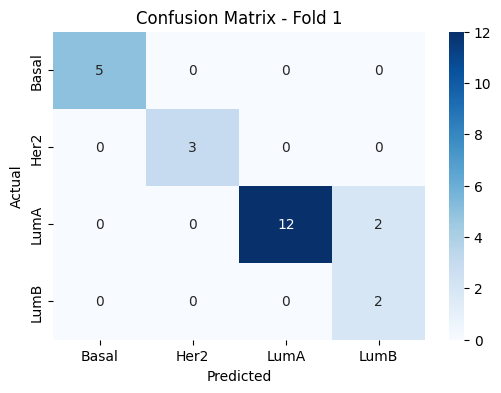


Confusion Matrix for Fold 2:


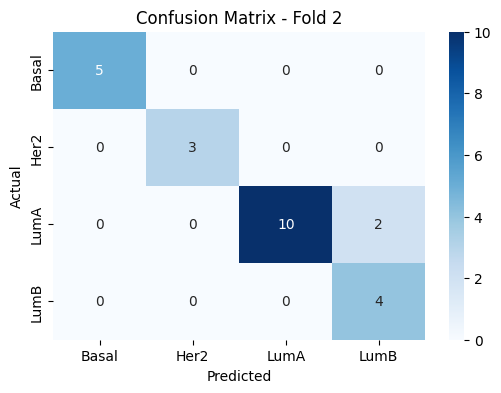


Confusion Matrix for Fold 3:


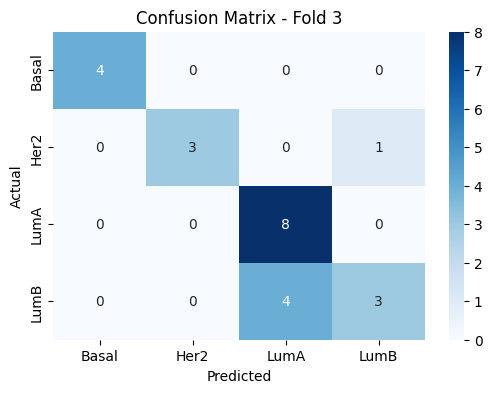


Confusion Matrix for Fold 4:


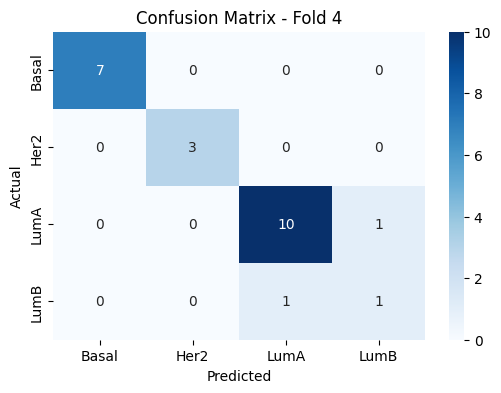


Confusion Matrix for Fold 5:


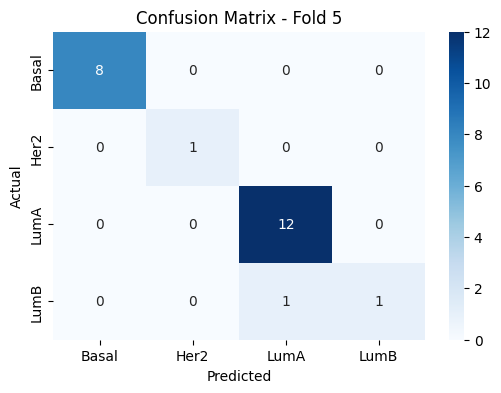

--- LogisticRegression ---
Avg accuracy : 0.897
Avg F1 : 0.877
Avg Recall : 0.896
Avg Precision : 0.889

Aggregated Confusion Matrix:


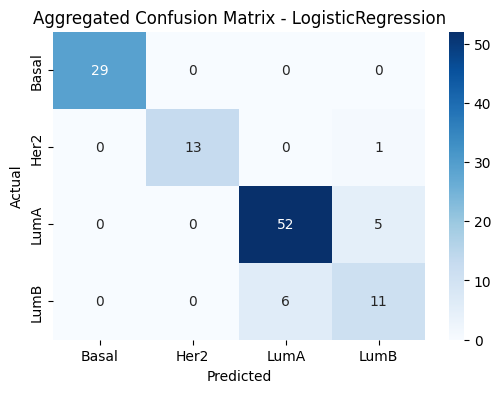

In [56]:
X = df_rfeca.iloc[:, 1:-1]
y = df_rfeca.iloc[:, -1]

kf = KFold(n_splits=k, shuffle=True, random_state=5)
model = LogisticRegression(random_state=42, max_iter=1000)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_rfeca_lr = []
all_pred_values_rfeca_lr = []
all_y_test_rfeca_lr = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]



    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_rfeca_lr.extend(test_index)
    all_pred_values_rfeca_lr.extend(pred_values)
    all_y_test_rfeca_lr.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values, labels=all_labels))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- LogisticRegression ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - LogisticRegression')
plt.show()

In [57]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_logistic_rfeca = pd.DataFrame({
    'Model': 'Logistic Regression/RFECA',
    'Original_Index': all_test_indices_rfeca_lr,
    'Actual_Label': all_y_test_rfeca_lr,
    'Predicted_Label': all_pred_values_rfeca_lr
})

# Identify misclassified instances
misclassified_instances_logistic_rfeca = misclassification_analysis_df_logistic_rfeca[misclassification_analysis_df_logistic_rfeca['Actual_Label'] != misclassification_analysis_df_logistic_rfeca['Predicted_Label']]

print("Misclassified Instances by the Logistic Regression Classifier:")
display(misclassified_instances_logistic_rfeca)

print("\nOriginal data for misclassified instances (from df_rfeca):")
display(df_rfeca.loc[misclassified_instances_logistic_rfeca['Original_Index']])

Misclassified Instances by the Logistic Regression Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
11,Logistic Regression/RFECA,52,LumA,LumB
12,Logistic Regression/RFECA,59,LumA,LumB
35,Logistic Regression/RFECA,50,LumA,LumB
45,Logistic Regression/RFECA,101,LumA,LumB
51,Logistic Regression/RFECA,19,Her2,LumB
60,Logistic Regression/RFECA,60,LumB,LumA
61,Logistic Regression/RFECA,66,LumB,LumA
65,Logistic Regression/RFECA,85,LumB,LumA
66,Logistic Regression/RFECA,88,LumB,LumA
82,Logistic Regression/RFECA,51,LumB,LumA



Original data for misclassified instances (from df_rfeca):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
52,X21BR002,-0.5791,-1.1947,1.7865,0.6370,-0.0883,0.9587,0.0220,0.1659,0.2252,...,-0.2871,0.2592,-0.1273,-3.5615,2.0223,0.8337,-0.1497,-0.4558,-0.1625,LumA
59,X11BR025,-0.8870,-1.8227,-0.5138,1.4752,1.7175,-1.8498,0.8108,-0.2684,-0.7618,...,0.1971,-1.0938,-0.4120,-3.6992,-1.5783,-4.5582,-1.0274,-1.6596,-1.0941,LumA
50,X18BR017,-0.6226,-0.2219,0.8540,1.2603,-1.0407,-0.2087,-0.3088,1.8833,-0.5351,...,-5.5478,-1.3435,1.7909,-1.8719,0.6504,-3.4090,0.2861,-0.7391,-0.2615,LumA
101,X03BR011,-0.0990,0.1907,1.6040,-1.4810,-0.0992,0.5104,0.2207,1.6779,-0.8417,...,-1.2691,-0.3324,-0.1146,0.0162,0.3431,1.5424,0.0178,-0.1081,1.8301,LumA
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
66,X18BR006,-0.3573,-0.1113,1.7397,3.9625,2.1530,0.9864,0.3751,0.3975,0.1348,...,0.0659,0.5060,0.5895,-1.6146,3.1904,-5.1059,0.0736,1.6315,0.8831,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
88,X16BR012,0.5152,0.9226,0.7078,0.2123,0.3567,0.1400,1.0788,1.7500,0.9870,...,-1.4828,0.9290,0.9459,-1.5434,-1.3961,-1.2880,1.1364,1.2916,1.6645,LumB
51,X18BR003,-1.0274,0.4489,0.6030,0.6028,0.9853,-1.5165,0.1208,-1.2933,-0.4016,...,-3.5239,0.7768,-0.6633,-0.7040,-0.1094,2.6649,0.9578,0.5672,1.6411,LumB


# Pipeline 2: RFECA + Random Forest


Confusion Matrix for Fold 1:


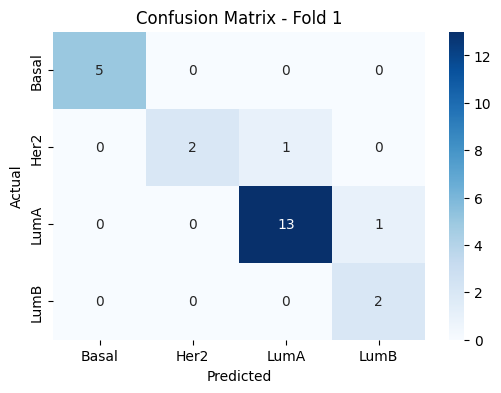


Confusion Matrix for Fold 2:


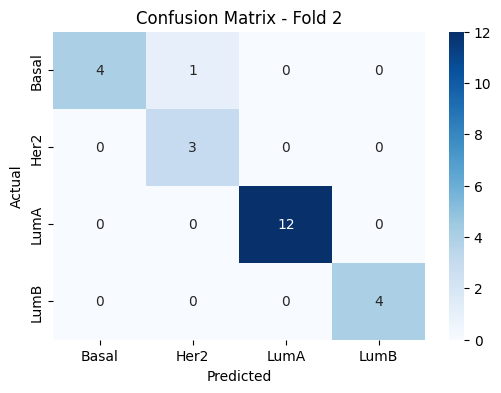


Confusion Matrix for Fold 3:


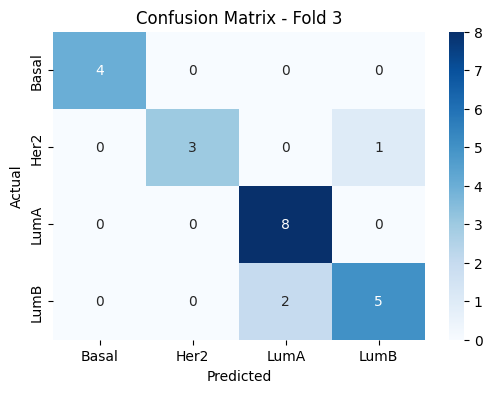


Confusion Matrix for Fold 4:


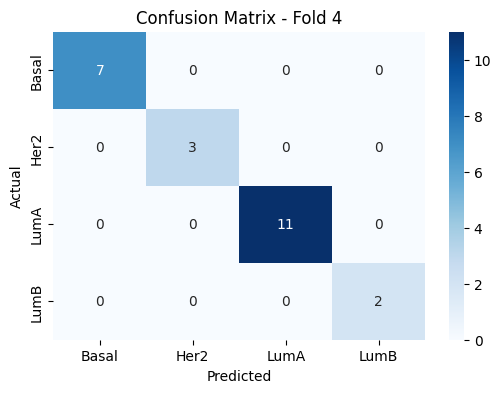


Confusion Matrix for Fold 5:


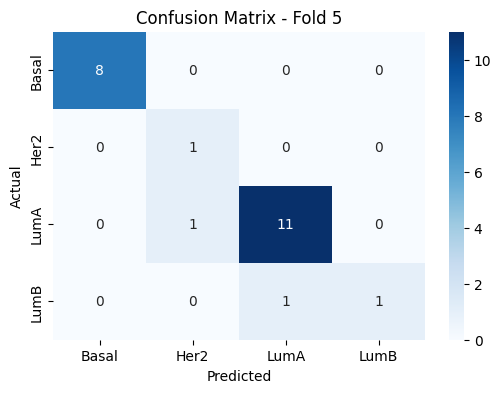

--- RandomForestClassifier ---
Avg accuracy : 0.932
Avg F1 : 0.902
Avg Recall : 0.92
Avg Precision : 0.914

Aggregated Confusion Matrix:


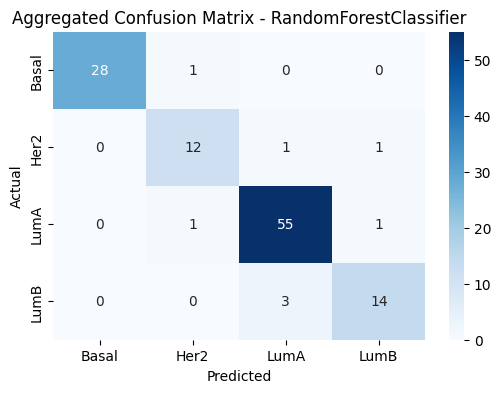

In [58]:
X = df_rfeca.iloc[:, 1:-1]
y = df_rfeca.iloc[:, -1]

kf = KFold(n_splits=k, shuffle=True, random_state=5)
model = RandomForestClassifier(random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_rfeca_rf = []
all_pred_values_rfeca_rf = []
all_y_test_rfeca_rf = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_rfeca_rf.extend(test_index)
    all_pred_values_rfeca_rf.extend(pred_values)
    all_y_test_rfeca_rf.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- RandomForestClassifier ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - RandomForestClassifier')
plt.show()

In [59]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_rf_rfeca = pd.DataFrame({
    'Model': 'Random Forest/RFECA',
    'Original_Index': all_test_indices_rfeca_rf,
    'Actual_Label': all_y_test_rfeca_rf,
    'Predicted_Label': all_pred_values_rfeca_rf
})

# Identify misclassified instances
misclassified_instances_rf_rfeca = misclassification_analysis_df_rf_rfeca[misclassification_analysis_df_rf_rfeca['Actual_Label'] != misclassification_analysis_df_rf_rfeca['Predicted_Label']]

print("Misclassified Instances by the Random Forest Classifier:")
display(misclassified_instances_rf_rfeca)

print("\nOriginal data for misclassified instances (from df_rfeca):")
display(df_rfeca.loc[misclassified_instances_rf_rfeca['Original_Index']])

Misclassified Instances by the Random Forest Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
4,Random Forest/RFECA,23,Her2,LumA
21,Random Forest/RFECA,108,LumA,LumB
37,Random Forest/RFECA,56,Basal,Her2
51,Random Forest/RFECA,19,Her2,LumB
60,Random Forest/RFECA,60,LumB,LumA
65,Random Forest/RFECA,85,LumB,LumA
95,Random Forest/RFECA,8,LumA,Her2
110,Random Forest/RFECA,99,LumB,LumA



Original data for misclassified instances (from df_rfeca):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
23,X05BR044,-1.9026,0.0175,-0.9034,-3.8815,0.1002,0.7659,-0.6464,-0.0741,0.2008,...,-0.2479,-0.5548,0.3567,-2.5423,-3.2600,4.6892,-1.8346,-1.1085,-1.6808,Her2
108,X01BR033,-1.4394,0.3759,2.5634,-1.4057,1.1095,0.6959,0.2120,-1.5856,1.1844,...,-1.5152,0.5508,0.1792,0.6630,-0.8256,-0.7614,-1.0824,1.2480,1.1646,LumA
56,X05BR001,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,...,1.7323,1.2345,0.5815,1.6929,-1.3043,-7.2576,-1.2413,0.3613,-0.1473,Basal
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
8,X22BR005,-0.5472,1.2683,-2.1140,-1.6041,0.6033,1.0847,1.0360,0.1823,0.6905,...,1.5477,1.0482,-0.0516,0.0892,2.5845,-0.0520,-1.2013,0.3087,1.5750,LumA
99,X21BR001,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,...,-1.3295,-0.1099,-0.1818,-6.5061,-1.2984,-1.2323,0.4035,0.4945,-0.1207,LumB


# Pipeline 3: RFECA + SVC


Confusion Matrix for Fold 1:


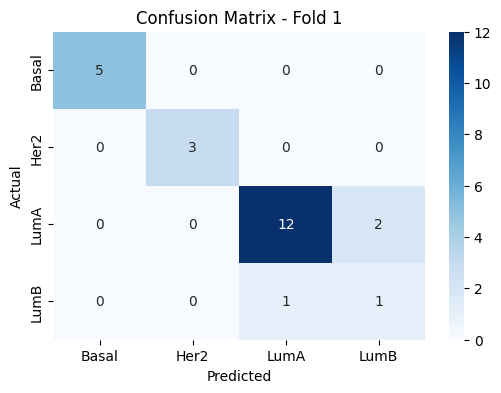


Confusion Matrix for Fold 2:


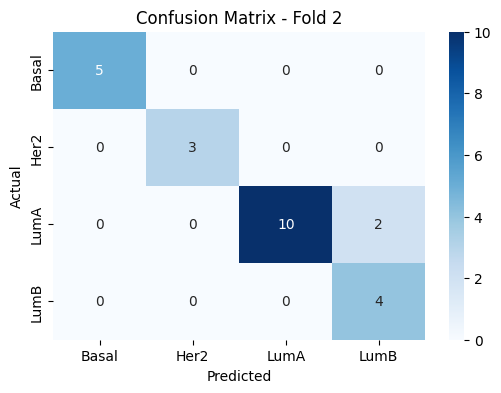


Confusion Matrix for Fold 3:


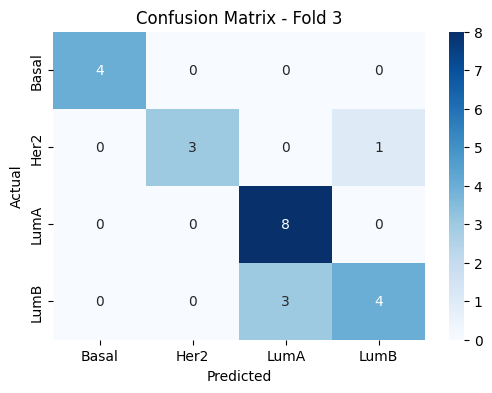


Confusion Matrix for Fold 4:


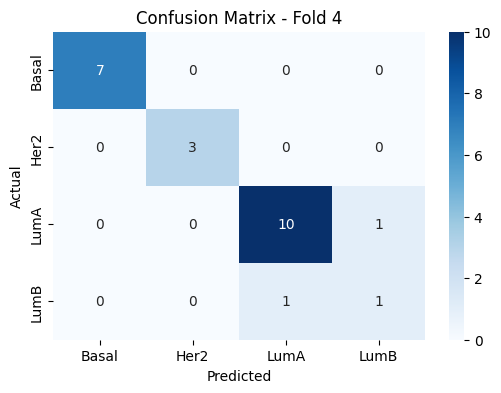


Confusion Matrix for Fold 5:


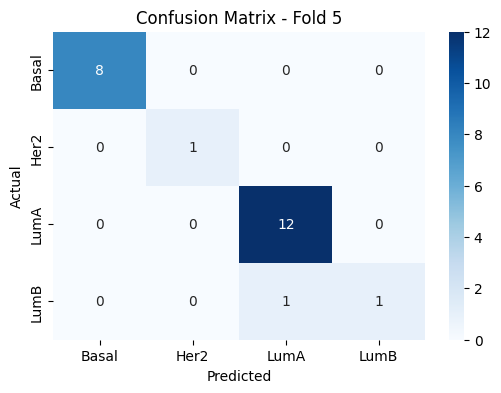

--- SVC ---
Avg accuracy : 0.897
Avg F1 : 0.87
Avg Recall : 0.889
Avg Precision : 0.871

Aggregated Confusion Matrix:


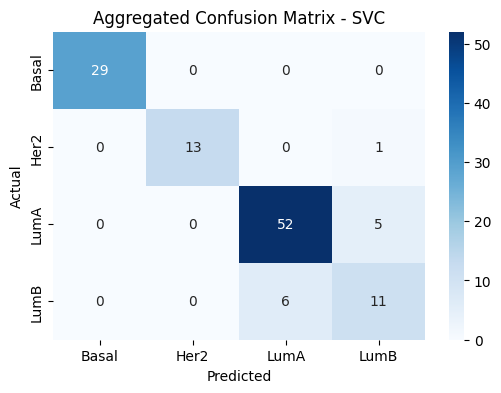

In [60]:
X = df_rfeca.iloc[:, 1:-1]
y = df_rfeca.iloc[:, -1]

kf = KFold(n_splits=k, shuffle=True, random_state=5)
model = SVC(kernel='linear', random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_rfeca_svc = []
all_pred_values_rfeca_svc = []
all_y_test_rfeca_svc = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_rfeca_svc.extend(test_index)
    all_pred_values_rfeca_svc.extend(pred_values)
    all_y_test_rfeca_svc.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- SVC ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - SVC')
plt.show()

In [61]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_svc_rfeca = pd.DataFrame({
    'Model': 'SVC/RFECA',
    'Original_Index': all_test_indices_rfeca_svc,
    'Actual_Label': all_y_test_rfeca_svc,
    'Predicted_Label': all_pred_values_rfeca_svc
})

# Identify misclassified instances
misclassified_instances_svc_rfeca = misclassification_analysis_df_svc_rfeca[misclassification_analysis_df_svc_rfeca['Actual_Label'] != misclassification_analysis_df_svc_rfeca['Predicted_Label']]

print("Misclassified Instances by the SVC Classifier:")
display(misclassified_instances_svc_rfeca)

print("\nOriginal data for misclassified instances (from df_rfeca):")
display(df_rfeca.loc[misclassified_instances_svc_rfeca['Original_Index']])

Misclassified Instances by the SVC Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
5,SVC/RFECA,28,LumB,LumA
11,SVC/RFECA,52,LumA,LumB
12,SVC/RFECA,59,LumA,LumB
35,SVC/RFECA,50,LumA,LumB
45,SVC/RFECA,101,LumA,LumB
51,SVC/RFECA,19,Her2,LumB
60,SVC/RFECA,60,LumB,LumA
61,SVC/RFECA,66,LumB,LumA
65,SVC/RFECA,85,LumB,LumA
82,SVC/RFECA,51,LumB,LumA



Original data for misclassified instances (from df_rfeca):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
28,X11BR009,0.0086,0.5933,0.6748,3.5583,0.4533,1.0340,-0.7206,0.7217,-0.1911,...,-5.4041,0.4113,0.3224,-1.3838,5.5891,-6.0406,1.1482,0.6758,1.0293,LumB
52,X21BR002,-0.5791,-1.1947,1.7865,0.6370,-0.0883,0.9587,0.0220,0.1659,0.2252,...,-0.2871,0.2592,-0.1273,-3.5615,2.0223,0.8337,-0.1497,-0.4558,-0.1625,LumA
59,X11BR025,-0.8870,-1.8227,-0.5138,1.4752,1.7175,-1.8498,0.8108,-0.2684,-0.7618,...,0.1971,-1.0938,-0.4120,-3.6992,-1.5783,-4.5582,-1.0274,-1.6596,-1.0941,LumA
50,X18BR017,-0.6226,-0.2219,0.8540,1.2603,-1.0407,-0.2087,-0.3088,1.8833,-0.5351,...,-5.5478,-1.3435,1.7909,-1.8719,0.6504,-3.4090,0.2861,-0.7391,-0.2615,LumA
101,X03BR011,-0.0990,0.1907,1.6040,-1.4810,-0.0992,0.5104,0.2207,1.6779,-0.8417,...,-1.2691,-0.3324,-0.1146,0.0162,0.3431,1.5424,0.0178,-0.1081,1.8301,LumA
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
66,X18BR006,-0.3573,-0.1113,1.7397,3.9625,2.1530,0.9864,0.3751,0.3975,0.1348,...,0.0659,0.5060,0.5895,-1.6146,3.1904,-5.1059,0.0736,1.6315,0.8831,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
51,X18BR003,-1.0274,0.4489,0.6030,0.6028,0.9853,-1.5165,0.1208,-1.2933,-0.4016,...,-3.5239,0.7768,-0.6633,-0.7040,-0.1094,2.6649,0.9578,0.5672,1.6411,LumB


# Pipeline 4: RFECA + Gradient Boosting

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix for Fold 1:


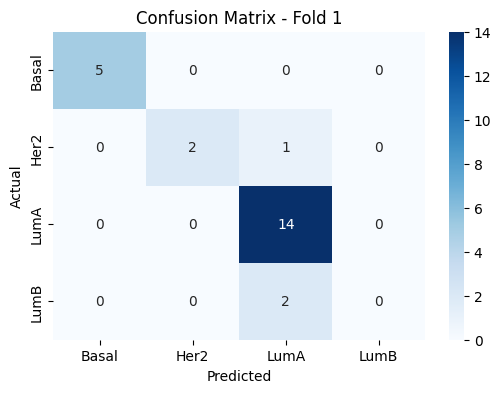


Confusion Matrix for Fold 2:


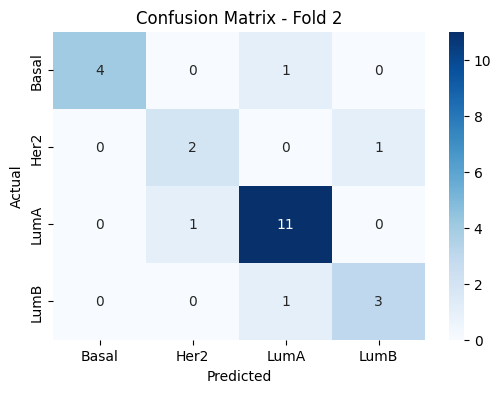


Confusion Matrix for Fold 3:


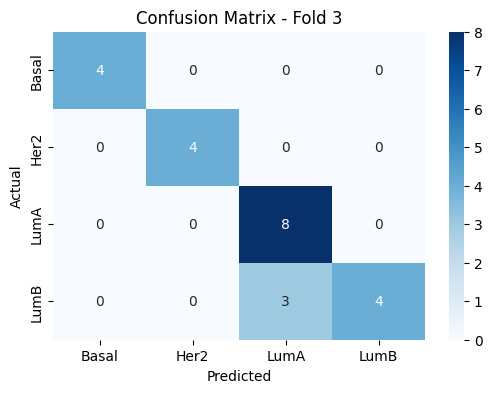


Confusion Matrix for Fold 4:


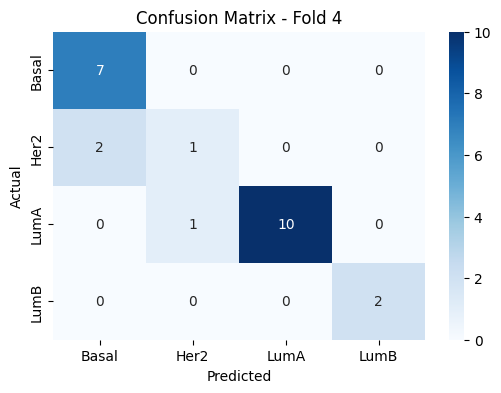


Confusion Matrix for Fold 5:


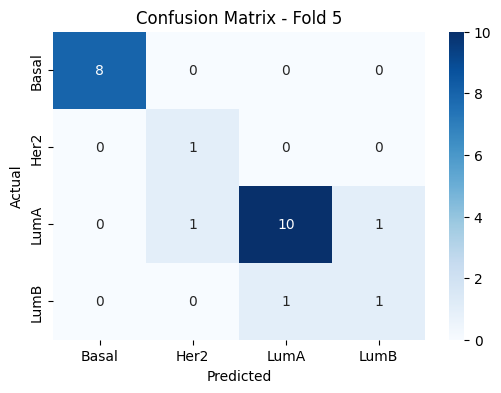

--- GradientBoostingClassifier ---
Avg accuracy : 0.863
Avg F1 : 0.786
Avg Recall : 0.8
Avg Precision : 0.797

Aggregated Confusion Matrix:


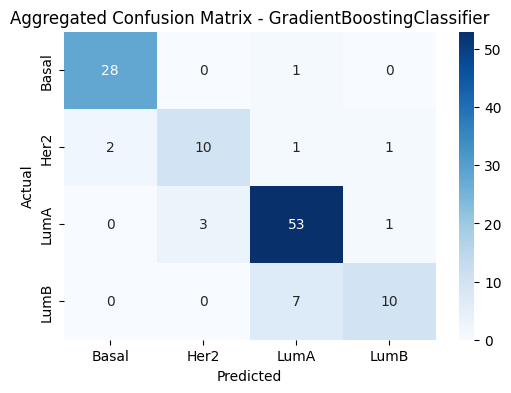

In [62]:
X = df_rfeca.iloc[:, 1:-1]
y = df_rfeca.iloc[:, -1]

kf = KFold(n_splits=k, shuffle=True, random_state=5)
model = GradientBoostingClassifier(random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_rfeca_gb = []
all_pred_values_rfeca_gb = []
all_y_test_rfeca_gb = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_rfeca_gb.extend(test_index)
    all_pred_values_rfeca_gb.extend(pred_values)
    all_y_test_rfeca_gb.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- GradientBoostingClassifier ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - GradientBoostingClassifier')
plt.show()

In [63]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_gradient_rfeca = pd.DataFrame({
    'Model': 'Gradient Boosting/RFECA',
    'Original_Index': all_test_indices_rfeca_gb,
    'Actual_Label': all_y_test_rfeca_gb,
    'Predicted_Label': all_pred_values_rfeca_gb
})

# Identify misclassified instances
misclassified_instances_gradient_rfeca = misclassification_analysis_df_gradient_rfeca[misclassification_analysis_df_gradient_rfeca['Actual_Label'] != misclassification_analysis_df_gradient_rfeca['Predicted_Label']]

print("Misclassified Instances by the Gradient Boosting Classifier:")
display(misclassified_instances_gradient_rfeca)

print("\nOriginal data for misclassified instances (from df_rfeca):")
display(df_rfeca.loc[misclassified_instances_gradient_rfeca['Original_Index']])

Misclassified Instances by the Gradient Boosting Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
4,Gradient Boosting/RFECA,23,Her2,LumA
5,Gradient Boosting/RFECA,28,LumB,LumA
23,Gradient Boosting/RFECA,116,LumB,LumA
32,Gradient Boosting/RFECA,45,Her2,LumB
37,Gradient Boosting/RFECA,56,Basal,LumA
41,Gradient Boosting/RFECA,87,LumB,LumA
45,Gradient Boosting/RFECA,101,LumA,Her2
60,Gradient Boosting/RFECA,60,LumB,LumA
65,Gradient Boosting/RFECA,85,LumB,LumA
66,Gradient Boosting/RFECA,88,LumB,LumA



Original data for misclassified instances (from df_rfeca):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
23,X05BR044,-1.9026,0.0175,-0.9034,-3.8815,0.1002,0.7659,-0.6464,-0.0741,0.2008,...,-0.2479,-0.5548,0.3567,-2.5423,-3.2600,4.6892,-1.8346,-1.1085,-1.6808,Her2
28,X11BR009,0.0086,0.5933,0.6748,3.5583,0.4533,1.0340,-0.7206,0.7217,-0.1911,...,-5.4041,0.4113,0.3224,-1.3838,5.5891,-6.0406,1.1482,0.6758,1.0293,LumB
116,X11BR015,0.8972,0.3492,-0.8944,2.0152,0.6152,0.1253,0.7211,-1.0174,0.7585,...,-4.4392,1.5696,-0.9754,-2.2038,1.2934,-4.4099,0.6684,0.7983,0.9928,LumB
45,X20BR008,-0.8461,1.2802,-2.4838,-2.7347,-1.0960,0.1373,0.3742,1.2295,-1.2998,...,-3.6078,-0.3508,2.5399,-3.7071,-1.7089,3.1949,-0.0037,-1.0901,-0.1116,Her2
56,X05BR001,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,...,1.7323,1.2345,0.5815,1.6929,-1.3043,-7.2576,-1.2413,0.3613,-0.1473,Basal
87,X11BR075,-0.4407,2.1178,-0.7855,-0.1167,1.4519,-0.8742,-0.7657,1.3136,0.4032,...,0.6963,1.6248,1.7457,1.5824,5.1998,-5.0991,-0.3122,1.4293,1.4136,LumB
101,X03BR011,-0.0990,0.1907,1.6040,-1.4810,-0.0992,0.5104,0.2207,1.6779,-0.8417,...,-1.2691,-0.3324,-0.1146,0.0162,0.3431,1.5424,0.0178,-0.1081,1.8301,LumA
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
88,X16BR012,0.5152,0.9226,0.7078,0.2123,0.3567,0.1400,1.0788,1.7500,0.9870,...,-1.4828,0.9290,0.9459,-1.5434,-1.3961,-1.2880,1.1364,1.2916,1.6645,LumB


# Pipeline 5: KNN Impute + Logistic Regression


Confusion Matrix for Fold 1:


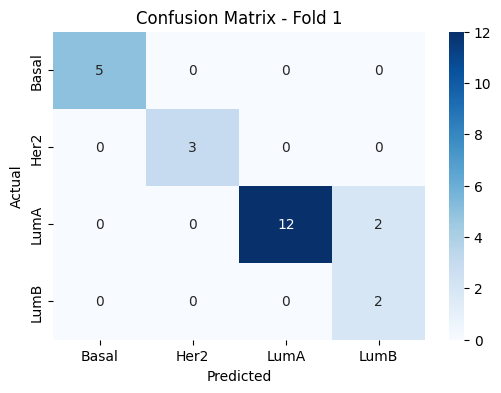


Confusion Matrix for Fold 2:


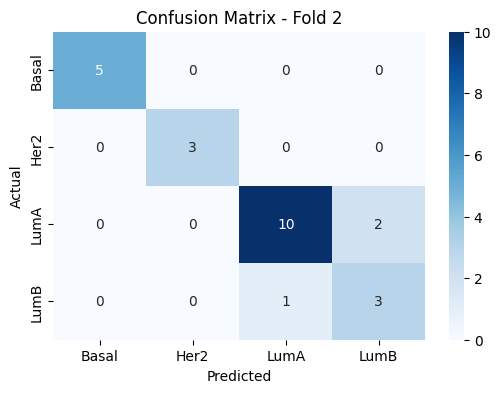


Confusion Matrix for Fold 3:


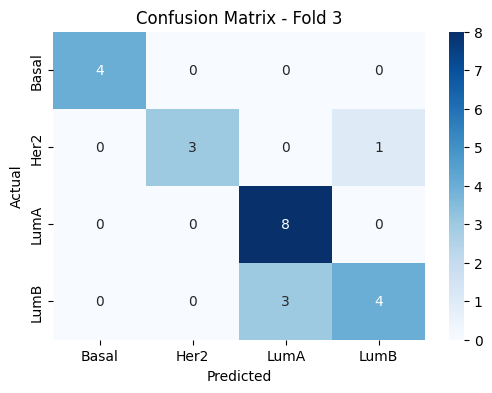


Confusion Matrix for Fold 4:


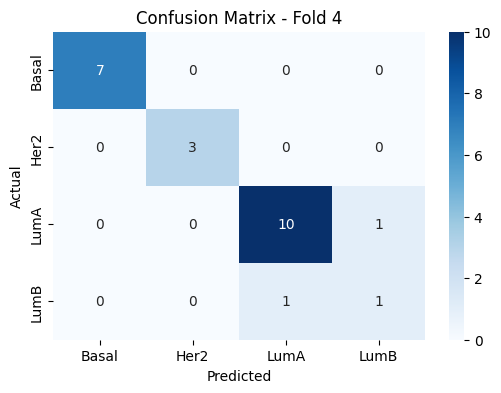


Confusion Matrix for Fold 5:


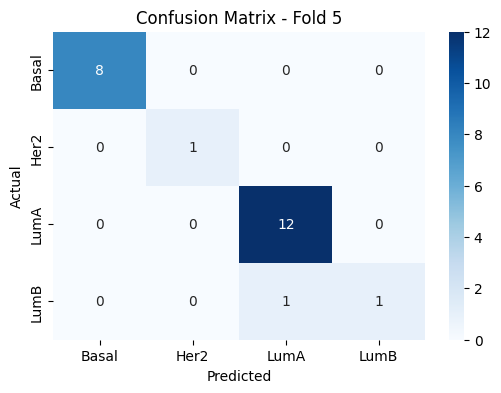

--- LogisticRegression ---
Avg accuracy : 0.897
Avg F1 : 0.876
Avg Recall : 0.893
Avg Precision : 0.884

Aggregated Confusion Matrix:


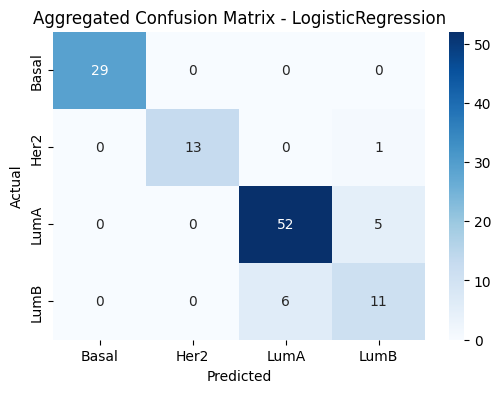

In [64]:
X = df_knn.iloc[:, 1:-1]
y = df_knn.iloc[:, -1]

kf = KFold(n_splits=k, shuffle=True, random_state=5)
model = LogisticRegression(random_state=42, max_iter=1000)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_knn_lr = []
all_pred_values_knn_lr = []
all_y_test_knn_lr = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_knn_lr.extend(test_index)
    all_pred_values_knn_lr.extend(pred_values)
    all_y_test_knn_lr.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values, labels=all_labels))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- LogisticRegression ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - LogisticRegression')
plt.show()

In [65]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_logistic_knn = pd.DataFrame({
    'Model': 'Logistic Regression/KNN Impute',
    'Original_Index': all_test_indices_knn_lr,
    'Actual_Label': all_y_test_knn_lr,
    'Predicted_Label': all_pred_values_knn_lr
})

# Identify misclassified instances
misclassified_instances_logistic_knn = misclassification_analysis_df_logistic_knn[misclassification_analysis_df_logistic_knn['Actual_Label'] != misclassification_analysis_df_logistic_knn['Predicted_Label']]

print("Misclassified Instances by the Gradient Boosting Classifier:")
display(misclassified_instances_logistic_knn)

print("\nOriginal data for misclassified instances (from df_knn):")
display(df_rfeca.loc[misclassified_instances_logistic_knn['Original_Index']])

Misclassified Instances by the Gradient Boosting Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
11,Logistic Regression/KNN Impute,52,LumA,LumB
12,Logistic Regression/KNN Impute,59,LumA,LumB
35,Logistic Regression/KNN Impute,50,LumA,LumB
42,Logistic Regression/KNN Impute,89,LumB,LumA
45,Logistic Regression/KNN Impute,101,LumA,LumB
51,Logistic Regression/KNN Impute,19,Her2,LumB
60,Logistic Regression/KNN Impute,60,LumB,LumA
61,Logistic Regression/KNN Impute,66,LumB,LumA
65,Logistic Regression/KNN Impute,85,LumB,LumA
82,Logistic Regression/KNN Impute,51,LumB,LumA



Original data for misclassified instances (from df_knn):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
52,X21BR002,-0.5791,-1.1947,1.7865,0.6370,-0.0883,0.9587,0.0220,0.1659,0.2252,...,-0.2871,0.2592,-0.1273,-3.5615,2.0223,0.8337,-0.1497,-0.4558,-0.1625,LumA
59,X11BR025,-0.8870,-1.8227,-0.5138,1.4752,1.7175,-1.8498,0.8108,-0.2684,-0.7618,...,0.1971,-1.0938,-0.4120,-3.6992,-1.5783,-4.5582,-1.0274,-1.6596,-1.0941,LumA
50,X18BR017,-0.6226,-0.2219,0.8540,1.2603,-1.0407,-0.2087,-0.3088,1.8833,-0.5351,...,-5.5478,-1.3435,1.7909,-1.8719,0.6504,-3.4090,0.2861,-0.7391,-0.2615,LumA
89,X01BR032,0.3655,1.0252,-1.4250,0.7294,0.4985,2.7968,1.6091,1.3077,2.0300,...,0.7505,1.5224,0.6226,-7.4613,2.0927,3.3785,0.5937,0.7207,2.9603,LumB
101,X03BR011,-0.0990,0.1907,1.6040,-1.4810,-0.0992,0.5104,0.2207,1.6779,-0.8417,...,-1.2691,-0.3324,-0.1146,0.0162,0.3431,1.5424,0.0178,-0.1081,1.8301,LumA
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
66,X18BR006,-0.3573,-0.1113,1.7397,3.9625,2.1530,0.9864,0.3751,0.3975,0.1348,...,0.0659,0.5060,0.5895,-1.6146,3.1904,-5.1059,0.0736,1.6315,0.8831,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
51,X18BR003,-1.0274,0.4489,0.6030,0.6028,0.9853,-1.5165,0.1208,-1.2933,-0.4016,...,-3.5239,0.7768,-0.6633,-0.7040,-0.1094,2.6649,0.9578,0.5672,1.6411,LumB


# Pipeline 6: KNN Impute + Random Forest


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


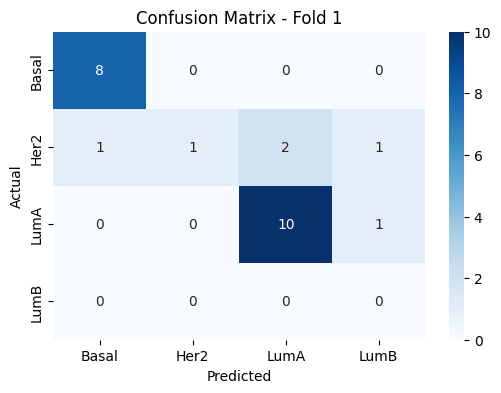


Confusion Matrix for Fold 2:


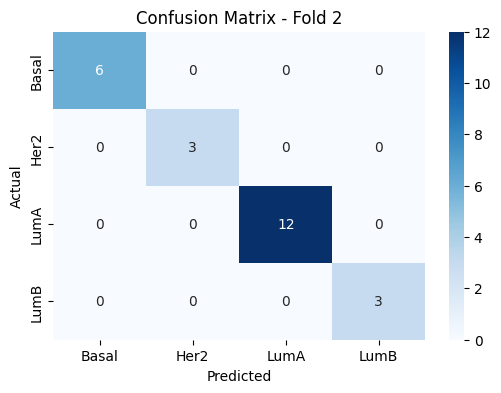


Confusion Matrix for Fold 3:


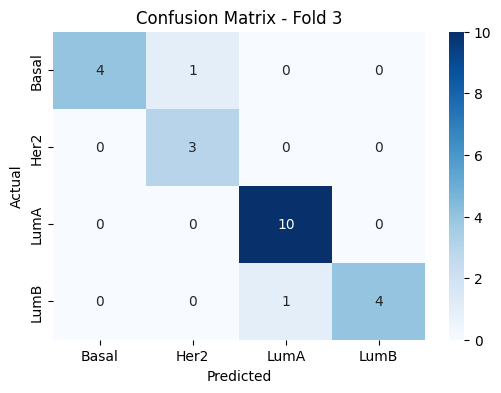


Confusion Matrix for Fold 4:


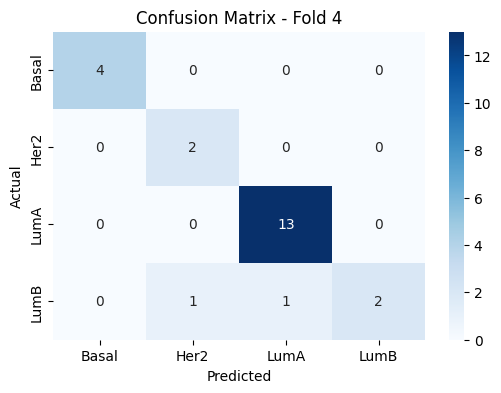


Confusion Matrix for Fold 5:


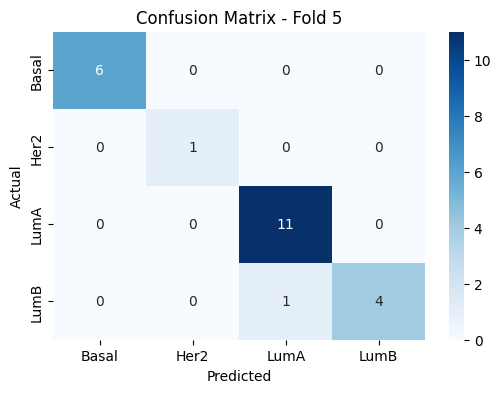

--- RandomForestClassifier ---
Avg accuracy : 0.915
Avg F1 : 0.85
Avg Recall : 0.895
Avg Precision : 0.85

Aggregated Confusion Matrix:


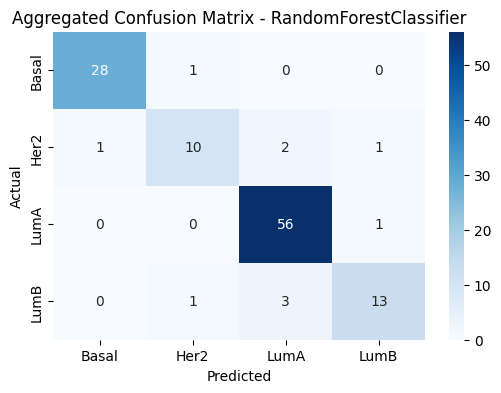

In [66]:
X = df_knn.iloc[:, 1:-1]
y = df_knn.iloc[:, -1]

kf = KFold(n_splits=k)
model = RandomForestClassifier(random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_knn_rf = []
all_pred_values_knn_rf = []
all_y_test_knn_rf = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_knn_rf.extend(test_index)
    all_pred_values_knn_rf.extend(pred_values)
    all_y_test_knn_rf.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- RandomForestClassifier ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - RandomForestClassifier')
plt.show()

In [67]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_rf_knn = pd.DataFrame({
    'Model': 'Random Forest/KNN Impute',
    'Original_Index': all_test_indices_knn_rf,
    'Actual_Label': all_y_test_knn_rf,
    'Predicted_Label': all_pred_values_knn_rf
})

# Identify misclassified instances
misclassified_instances_rf_knn = misclassification_analysis_df_rf_knn[misclassification_analysis_df_rf_knn['Actual_Label'] != misclassification_analysis_df_rf_knn['Predicted_Label']]

print("Misclassified Instances by the Random Forest Classifier:")
display(misclassified_instances_rf_knn)

print("\nOriginal data for misclassified instances (from df_knn):")
display(df_rfeca.loc[misclassified_instances_rf_knn['Original_Index']])

Misclassified Instances by the Random Forest Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
8,Random Forest/KNN Impute,8,LumA,LumB
9,Random Forest/KNN Impute,9,Her2,Basal
19,Random Forest/KNN Impute,19,Her2,LumB
22,Random Forest/KNN Impute,22,Her2,LumA
23,Random Forest/KNN Impute,23,Her2,LumA
56,Random Forest/KNN Impute,56,Basal,Her2
60,Random Forest/KNN Impute,60,LumB,LumA
85,Random Forest/KNN Impute,85,LumB,LumA
87,Random Forest/KNN Impute,87,LumB,Her2
99,Random Forest/KNN Impute,99,LumB,LumA



Original data for misclassified instances (from df_knn):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
8,X22BR005,-0.5472,1.2683,-2.1140,-1.6041,0.6033,1.0847,1.0360,0.1823,0.6905,...,1.5477,1.0482,-0.0516,0.0892,2.5845,-0.0520,-1.2013,0.3087,1.5750,LumA
9,X01BR017,-0.3631,2.3125,-1.2797,-3.7791,2.0076,0.1308,1.9430,4.5651,0.9990,...,1.4969,0.8710,2.1974,2.3869,-1.8694,2.8236,0.2018,1.2523,0.2148,Her2
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
22,X01BR010,-0.1795,-0.2419,0.0352,-4.2793,-0.3635,1.0854,0.5748,0.1214,0.8139,...,-0.1451,-0.8384,1.0933,-2.4218,-1.3208,4.0594,-0.8357,-0.1466,-0.3473,Her2
23,X05BR044,-1.9026,0.0175,-0.9034,-3.8815,0.1002,0.7659,-0.6464,-0.0741,0.2008,...,-0.2479,-0.5548,0.3567,-2.5423,-3.2600,4.6892,-1.8346,-1.1085,-1.6808,Her2
56,X05BR001,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,...,1.7323,1.2345,0.5815,1.6929,-1.3043,-7.2576,-1.2413,0.3613,-0.1473,Basal
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
87,X11BR075,-0.4407,2.1178,-0.7855,-0.1167,1.4519,-0.8742,-0.7657,1.3136,0.4032,...,0.6963,1.6248,1.7457,1.5824,5.1998,-5.0991,-0.3122,1.4293,1.4136,LumB
99,X21BR001,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,...,-1.3295,-0.1099,-0.1818,-6.5061,-1.2984,-1.2323,0.4035,0.4945,-0.1207,LumB


# Pipeline 7: KNN Impute + SVC


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


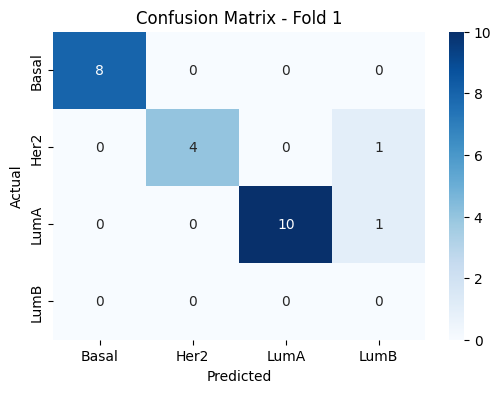


Confusion Matrix for Fold 2:


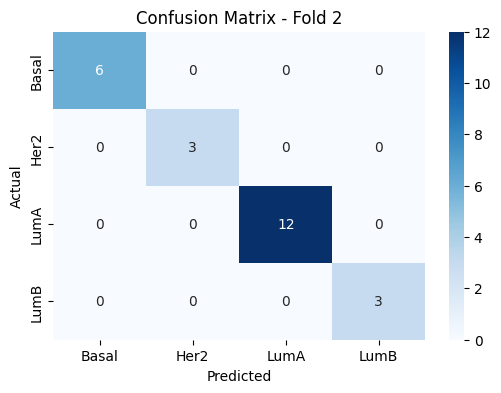


Confusion Matrix for Fold 3:


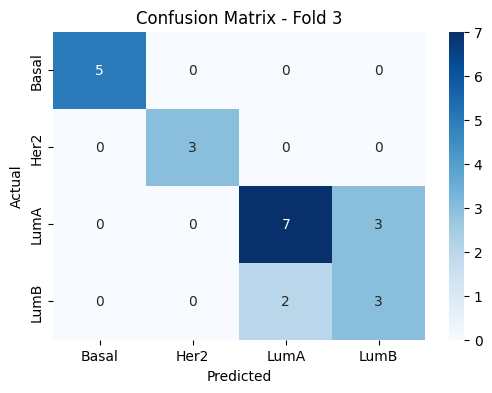


Confusion Matrix for Fold 4:


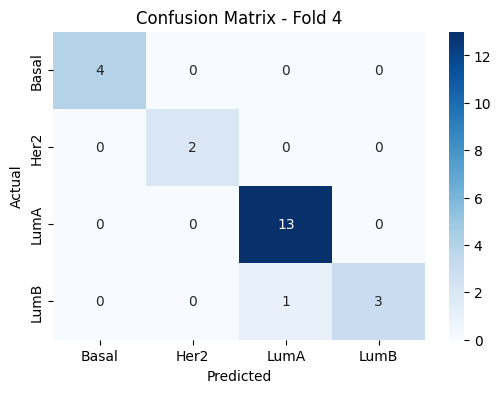


Confusion Matrix for Fold 5:


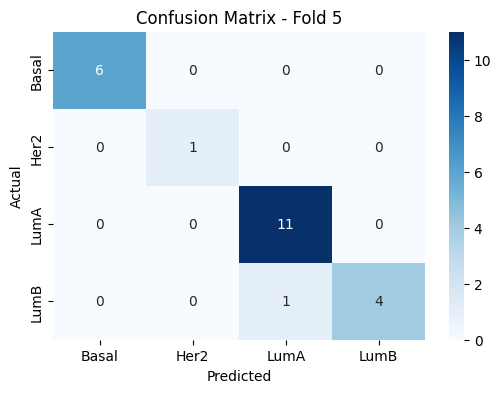

--- SVC ---
Avg accuracy : 0.922
Avg F1 : 0.889
Avg Recall : 0.906
Avg Precision : 0.878

Aggregated Confusion Matrix:


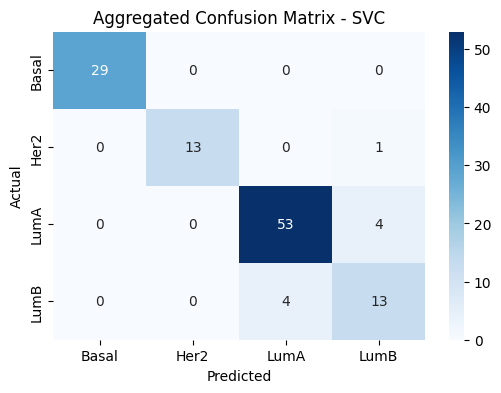

In [68]:
X = df_knn.iloc[:, 1:-1]
y = df_knn.iloc[:, -1]

kf = KFold(n_splits=k)
model = SVC(kernel='linear')

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_knn_svc = []
all_pred_values_knn_svc = []
all_y_test_knn_svc = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_knn_svc.extend(test_index)
    all_pred_values_knn_svc.extend(pred_values)
    all_y_test_knn_svc.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- SVC ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - SVC')
plt.show()

In [69]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_svc_knn = pd.DataFrame({
    'Model': 'SVC/KNN Impute',
    'Original_Index': all_test_indices_knn_svc,
    'Actual_Label': all_y_test_knn_svc,
    'Predicted_Label': all_pred_values_knn_svc
})

# Identify misclassified instances
misclassified_instances_svc_knn = misclassification_analysis_df_svc_knn[misclassification_analysis_df_svc_knn['Actual_Label'] != misclassification_analysis_df_svc_knn['Predicted_Label']]

print("Misclassified Instances by the SVC Classifier:")
display(misclassified_instances_svc_knn)

print("\nOriginal data for misclassified instances (from df_knn):")
display(df_rfeca.loc[misclassified_instances_svc_knn['Original_Index']])

Misclassified Instances by the SVC Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
6,SVC/KNN Impute,6,LumA,LumB
19,SVC/KNN Impute,19,Her2,LumB
49,SVC/KNN Impute,49,LumA,LumB
50,SVC/KNN Impute,50,LumA,LumB
51,SVC/KNN Impute,51,LumB,LumA
59,SVC/KNN Impute,59,LumA,LumB
60,SVC/KNN Impute,60,LumB,LumA
85,SVC/KNN Impute,85,LumB,LumA
99,SVC/KNN Impute,99,LumB,LumA



Original data for misclassified instances (from df_knn):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
6,X11BR051,0.8063,-0.7917,4.3564,1.2913,-0.3401,-0.2884,-0.9016,-2.0727,-0.9598,...,-3.9077,-0.3371,-0.9697,-7.5622,2.9425,2.7023,-0.6304,-0.5964,-0.6545,LumA
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
49,X11BR027,-0.1770,-0.2844,4.3043,1.6278,-0.2830,1.2461,-0.4030,-0.8186,-0.4191,...,1.4447,-0.5296,0.1624,-3.2176,0.9759,1.1300,0.8379,-0.2247,-0.3642,LumA
50,X18BR017,-0.6226,-0.2219,0.8540,1.2603,-1.0407,-0.2087,-0.3088,1.8833,-0.5351,...,-5.5478,-1.3435,1.7909,-1.8719,0.6504,-3.4090,0.2861,-0.7391,-0.2615,LumA
51,X18BR003,-1.0274,0.4489,0.6030,0.6028,0.9853,-1.5165,0.1208,-1.2933,-0.4016,...,-3.5239,0.7768,-0.6633,-0.7040,-0.1094,2.6649,0.9578,0.5672,1.6411,LumB
59,X11BR025,-0.8870,-1.8227,-0.5138,1.4752,1.7175,-1.8498,0.8108,-0.2684,-0.7618,...,0.1971,-1.0938,-0.4120,-3.6992,-1.5783,-4.5582,-1.0274,-1.6596,-1.0941,LumA
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
99,X21BR001,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,...,-1.3295,-0.1099,-0.1818,-6.5061,-1.2984,-1.2323,0.4035,0.4945,-0.1207,LumB


# Pipeline 8: KNN Impute + Gradient Boosting

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix for Fold 1:


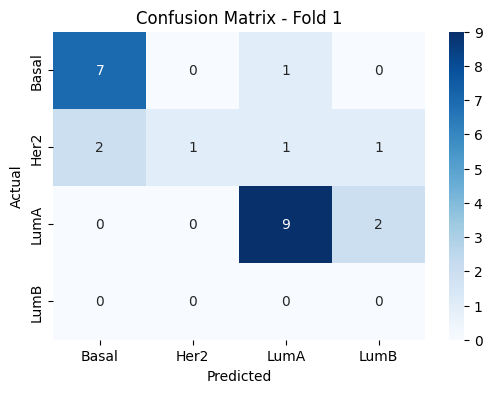


Confusion Matrix for Fold 2:


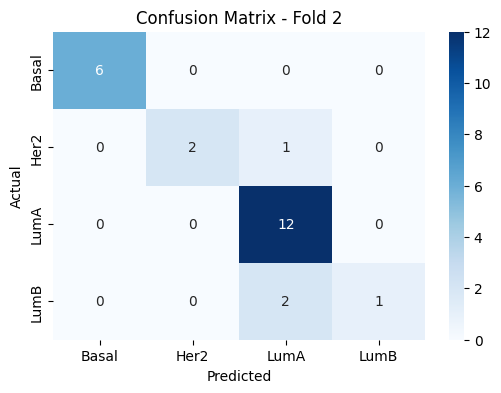


Confusion Matrix for Fold 3:


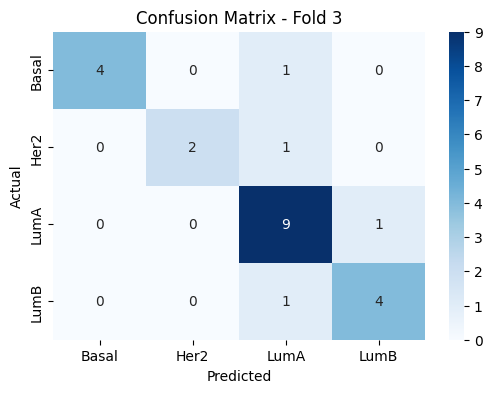


Confusion Matrix for Fold 4:


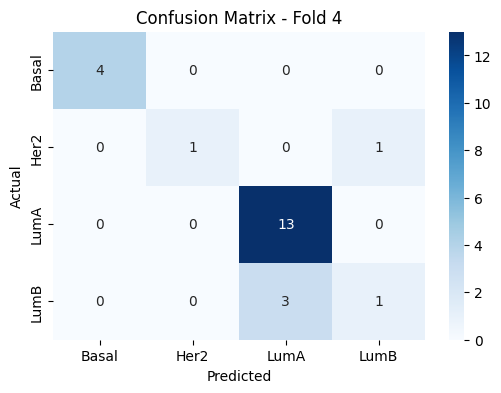


Confusion Matrix for Fold 5:


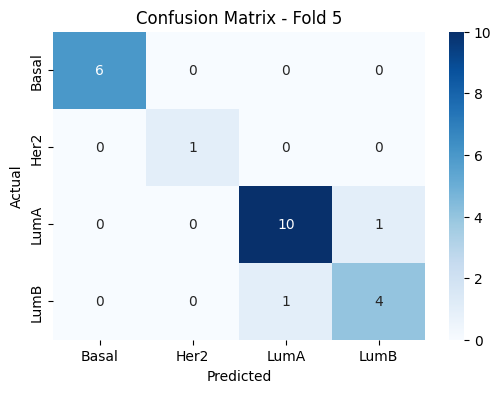

--- GradientBoostingClassifier ---
Avg accuracy : 0.83
Avg F1 : 0.754
Avg Recall : 0.848
Avg Precision : 0.726

Aggregated Confusion Matrix:


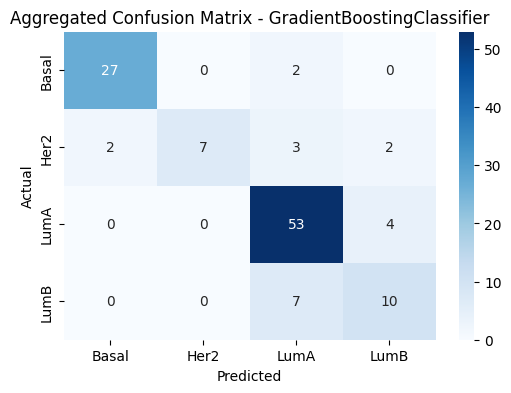

In [70]:
X = df_knn.iloc[:, 1:-1]
y = df_knn.iloc[:, -1]

kf = KFold(n_splits=k)
model = GradientBoostingClassifier(random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_knn_gb = []
all_pred_values_knn_gb = []
all_y_test_knn_gb = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_knn_gb.extend(test_index)
    all_pred_values_knn_gb.extend(pred_values)
    all_y_test_knn_gb.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- GradientBoostingClassifier ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - GradientBoostingClassifier')
plt.show()

In [71]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_gradient_knn = pd.DataFrame({
    'Model': 'Gradient Boosting/KNN Impute',
    'Original_Index': all_test_indices_knn_gb,
    'Actual_Label': all_y_test_knn_gb,
    'Predicted_Label': all_pred_values_knn_gb
})

# Identify misclassified instances
misclassified_instances_gradient_knn = misclassification_analysis_df_gradient_knn[misclassification_analysis_df_gradient_knn['Actual_Label'] != misclassification_analysis_df_gradient_knn['Predicted_Label']]

print("Misclassified Instances by the Gradient Boosting Classifier:")
display(misclassified_instances_gradient_knn)

print("\nOriginal data for misclassified instances (from df_simpleImpute):")
display(df_rfeca.loc[misclassified_instances_gradient_knn['Original_Index']])

Misclassified Instances by the Gradient Boosting Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
5,Gradient Boosting/KNN Impute,5,Her2,Basal
8,Gradient Boosting/KNN Impute,8,LumA,LumB
9,Gradient Boosting/KNN Impute,9,Her2,Basal
10,Gradient Boosting/KNN Impute,10,Basal,LumA
11,Gradient Boosting/KNN Impute,11,LumA,LumB
19,Gradient Boosting/KNN Impute,19,Her2,LumB
23,Gradient Boosting/KNN Impute,23,Her2,LumA
25,Gradient Boosting/KNN Impute,25,LumB,LumA
29,Gradient Boosting/KNN Impute,29,LumB,LumA
45,Gradient Boosting/KNN Impute,45,Her2,LumA



Original data for misclassified instances (from df_simpleImpute):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
5,X18BR002,-1.6084,2.5970,-1.1292,-3.6968,-0.5029,0.6432,-0.7106,0.8987,0.2932,...,1.2391,0.2373,-0.1891,2.6180,-3.7292,2.1683,-1.2364,0.3654,-0.2426,Her2
8,X22BR005,-0.5472,1.2683,-2.1140,-1.6041,0.6033,1.0847,1.0360,0.1823,0.6905,...,1.5477,1.0482,-0.0516,0.0892,2.5845,-0.0520,-1.2013,0.3087,1.5750,LumA
9,X01BR017,-0.3631,2.3125,-1.2797,-3.7791,2.0076,0.1308,1.9430,4.5651,0.9990,...,1.4969,0.8710,2.1974,2.3869,-1.8694,2.8236,0.2018,1.2523,0.2148,Her2
10,X01BR026,1.9124,-0.3288,0.0205,-1.4368,-0.4524,-0.3873,-0.4468,2.9314,0.6944,...,1.8850,0.3225,-1.4134,3.7049,-2.7049,-4.8993,0.4942,0.0327,0.2596,Basal
11,X05BR003,-1.8428,1.0673,-0.7148,1.7733,-0.5356,0.7814,-0.4379,-0.2686,-0.9052,...,-1.3742,0.0260,-0.9146,1.7611,-0.7619,1.3502,-1.1848,1.9183,-0.7594,LumA
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
23,X05BR044,-1.9026,0.0175,-0.9034,-3.8815,0.1002,0.7659,-0.6464,-0.0741,0.2008,...,-0.2479,-0.5548,0.3567,-2.5423,-3.2600,4.6892,-1.8346,-1.1085,-1.6808,Her2
25,X11BR044,0.4840,1.2711,-1.5198,0.3070,1.6021,-0.6270,2.3928,1.1263,1.6842,...,-3.8553,2.1793,1.0758,-4.4343,2.2786,-1.2861,1.2967,2.1630,2.8773,LumB
29,X11BR043,-1.3974,1.7338,1.0562,-0.6908,2.6707,1.7734,2.2089,-0.1180,1.2061,...,-1.8444,2.4148,1.3588,-4.3305,6.3366,-1.7784,1.4316,2.9002,2.4844,LumB
45,X20BR008,-0.8461,1.2802,-2.4838,-2.7347,-1.0960,0.1373,0.3742,1.2295,-1.2998,...,-3.6078,-0.3508,2.5399,-3.7071,-1.7089,3.1949,-0.0037,-1.0901,-0.1116,Her2


# Pipeline 9: Simple Impute + Logistic Regression


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


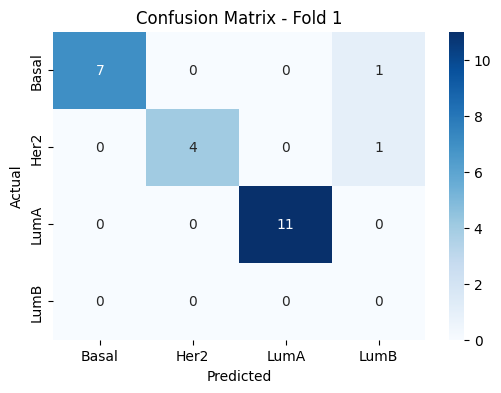


Confusion Matrix for Fold 2:


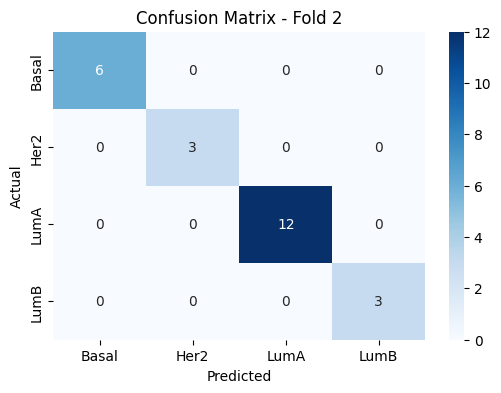


Confusion Matrix for Fold 3:


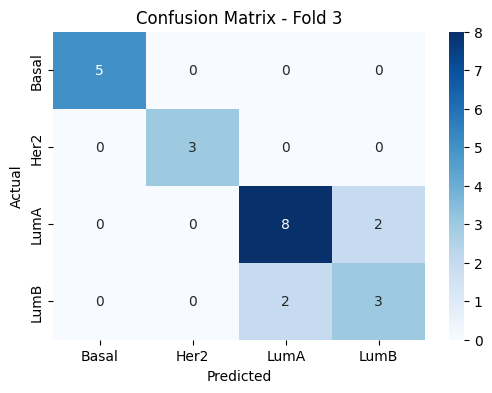


Confusion Matrix for Fold 4:


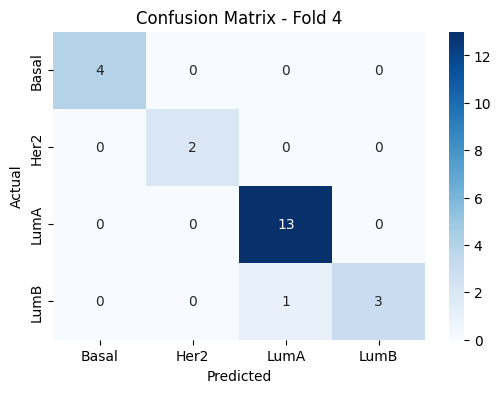


Confusion Matrix for Fold 5:


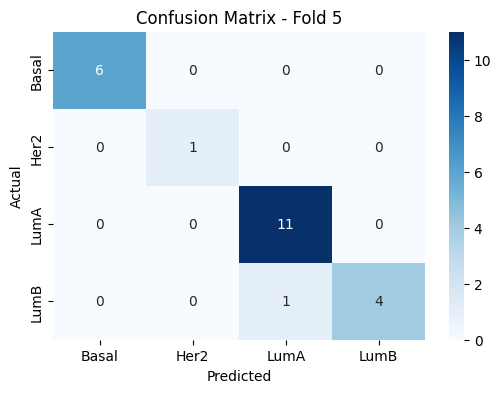

--- LogisticRegression ---
Avg accuracy : 0.931
Avg F1 : 0.894
Avg Recall : 0.912
Avg Precision : 0.881

Aggregated Confusion Matrix:


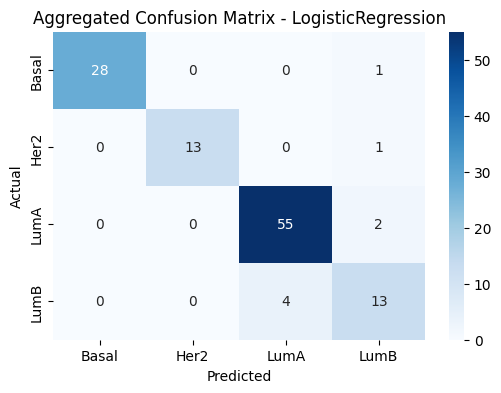

In [72]:
X = df_simpleInpute.iloc[:, 1:-1]
y = df_simpleInpute.iloc[:, -1]

kf = KFold(n_splits=k)
model = LogisticRegression(random_state=42, max_iter=1000)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_si_lr = []
all_pred_values_si_lr = []
all_y_test_si_lr = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_si_lr.extend(test_index)
    all_pred_values_si_lr.extend(pred_values)
    all_y_test_si_lr.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values, labels=all_labels))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- LogisticRegression ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - LogisticRegression')
plt.show()

In [73]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_logistic_simple = pd.DataFrame({
    'Model': 'Logistic Regression/Simple Impute',
    'Original_Index': all_test_indices_si_lr,
    'Actual_Label': all_y_test_si_lr,
    'Predicted_Label': all_pred_values_si_lr
})

# Identify misclassified instances
misclassified_instances_logistic_simple = misclassification_analysis_df_logistic_simple[misclassification_analysis_df_logistic_simple['Actual_Label'] != misclassification_analysis_df_logistic_simple['Predicted_Label']]

print("Misclassified Instances by the Logistic Regression Classifier:")
display(misclassified_instances_logistic_simple)

print("\nOriginal data for misclassified instances (from df_simpleImpute):")
display(df_rfeca.loc[misclassified_instances_logistic_simple['Original_Index']])

Misclassified Instances by the Logistic Regression Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
4,Logistic Regression/Simple Impute,4,Basal,LumB
19,Logistic Regression/Simple Impute,19,Her2,LumB
49,Logistic Regression/Simple Impute,49,LumA,LumB
51,Logistic Regression/Simple Impute,51,LumB,LumA
59,Logistic Regression/Simple Impute,59,LumA,LumB
60,Logistic Regression/Simple Impute,60,LumB,LumA
85,Logistic Regression/Simple Impute,85,LumB,LumA
99,Logistic Regression/Simple Impute,99,LumB,LumA



Original data for misclassified instances (from df_simpleImpute):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
4,X11BR036,1.7797,2.6335,0.6886,-0.6260,1.9677,-0.6331,3.1293,3.0898,2.8617,...,2.2834,3.0739,2.1254,-7.3423,-2.8209,-2.2993,2.8119,3.0335,1.9988,Basal
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
49,X11BR027,-0.1770,-0.2844,4.3043,1.6278,-0.2830,1.2461,-0.4030,-0.8186,-0.4191,...,1.4447,-0.5296,0.1624,-3.2176,0.9759,1.1300,0.8379,-0.2247,-0.3642,LumA
51,X18BR003,-1.0274,0.4489,0.6030,0.6028,0.9853,-1.5165,0.1208,-1.2933,-0.4016,...,-3.5239,0.7768,-0.6633,-0.7040,-0.1094,2.6649,0.9578,0.5672,1.6411,LumB
59,X11BR025,-0.8870,-1.8227,-0.5138,1.4752,1.7175,-1.8498,0.8108,-0.2684,-0.7618,...,0.1971,-1.0938,-0.4120,-3.6992,-1.5783,-4.5582,-1.0274,-1.6596,-1.0941,LumA
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
99,X21BR001,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,...,-1.3295,-0.1099,-0.1818,-6.5061,-1.2984,-1.2323,0.4035,0.4945,-0.1207,LumB


# Pipeline 10: Simple Impute + Random Forest


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


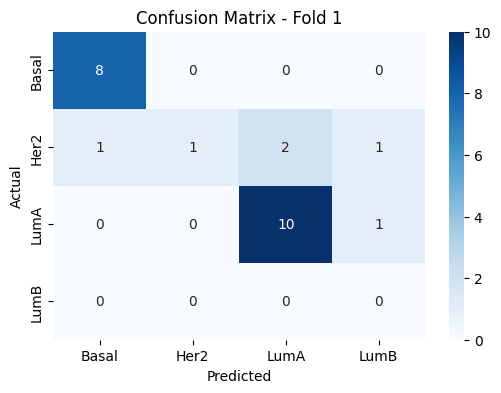


Confusion Matrix for Fold 2:


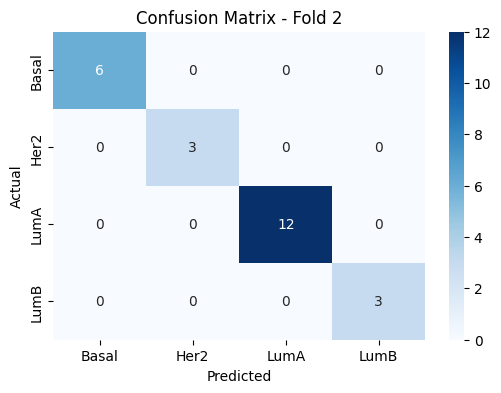


Confusion Matrix for Fold 3:


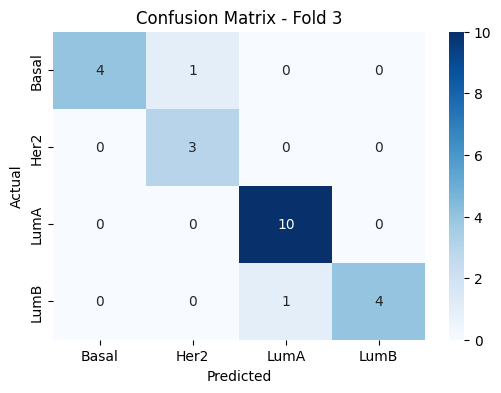


Confusion Matrix for Fold 4:


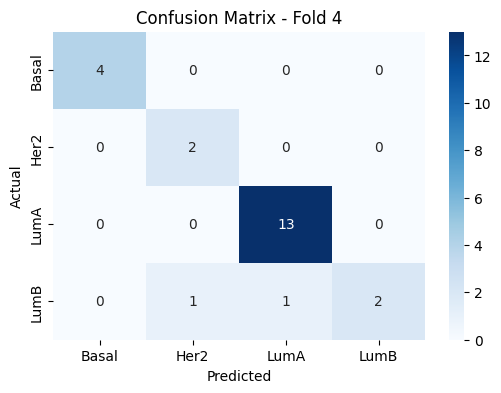


Confusion Matrix for Fold 5:


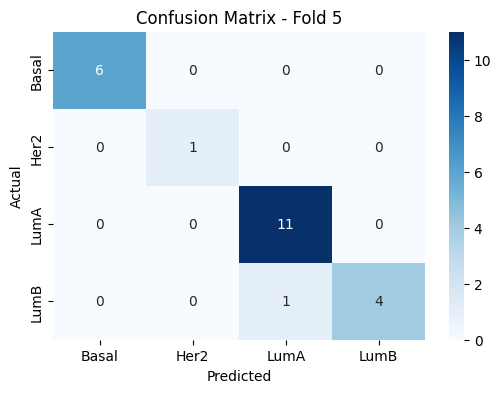

--- RandomForestClassifier ---
Avg accuracy : 0.915
Avg F1 : 0.85
Avg Recall : 0.895
Avg Precision : 0.85

Aggregated Confusion Matrix:


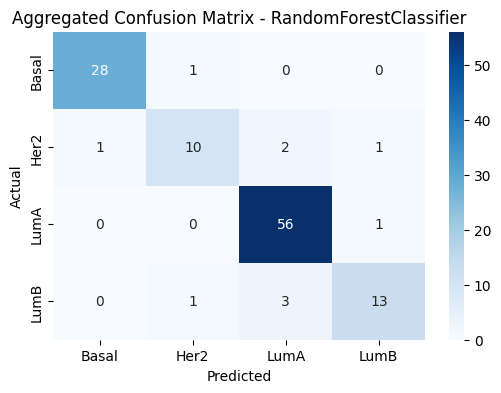

In [74]:
X = df_simpleInpute.iloc[:, 1:-1]
y = df_simpleInpute.iloc[:, -1]

kf = KFold(n_splits=k)
model = RandomForestClassifier(random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_si_rf = []
all_pred_values_si_rf = []
all_y_test_si_rf = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_si_rf.extend(test_index)
    all_pred_values_si_rf.extend(pred_values)
    all_y_test_si_rf.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- RandomForestClassifier ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - RandomForestClassifier')
plt.show()

In [75]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_rf_simple = pd.DataFrame({
    'Model': 'Random Forest/Simple Impute',
    'Original_Index': all_test_indices_si_rf,
    'Actual_Label': all_y_test_si_rf,
    'Predicted_Label': all_pred_values_si_rf
})

# Identify misclassified instances
misclassified_instances_rf_simple = misclassification_analysis_df_rf_simple[misclassification_analysis_df_rf_simple['Actual_Label'] != misclassification_analysis_df_rf_simple['Predicted_Label']]

print("Misclassified Instances by the Random Forest Classifier:")
display(misclassified_instances_rf_simple)

print("\nOriginal data for misclassified instances (from df_simpleImpute):")
display(df_rfeca.loc[misclassified_instances_rf_simple['Original_Index']])

Misclassified Instances by the Random Forest Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
8,Random Forest/Simple Impute,8,LumA,LumB
9,Random Forest/Simple Impute,9,Her2,Basal
19,Random Forest/Simple Impute,19,Her2,LumB
22,Random Forest/Simple Impute,22,Her2,LumA
23,Random Forest/Simple Impute,23,Her2,LumA
56,Random Forest/Simple Impute,56,Basal,Her2
60,Random Forest/Simple Impute,60,LumB,LumA
85,Random Forest/Simple Impute,85,LumB,LumA
87,Random Forest/Simple Impute,87,LumB,Her2
99,Random Forest/Simple Impute,99,LumB,LumA



Original data for misclassified instances (from df_simpleImpute):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
8,X22BR005,-0.5472,1.2683,-2.1140,-1.6041,0.6033,1.0847,1.0360,0.1823,0.6905,...,1.5477,1.0482,-0.0516,0.0892,2.5845,-0.0520,-1.2013,0.3087,1.5750,LumA
9,X01BR017,-0.3631,2.3125,-1.2797,-3.7791,2.0076,0.1308,1.9430,4.5651,0.9990,...,1.4969,0.8710,2.1974,2.3869,-1.8694,2.8236,0.2018,1.2523,0.2148,Her2
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
22,X01BR010,-0.1795,-0.2419,0.0352,-4.2793,-0.3635,1.0854,0.5748,0.1214,0.8139,...,-0.1451,-0.8384,1.0933,-2.4218,-1.3208,4.0594,-0.8357,-0.1466,-0.3473,Her2
23,X05BR044,-1.9026,0.0175,-0.9034,-3.8815,0.1002,0.7659,-0.6464,-0.0741,0.2008,...,-0.2479,-0.5548,0.3567,-2.5423,-3.2600,4.6892,-1.8346,-1.1085,-1.6808,Her2
56,X05BR001,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,...,1.7323,1.2345,0.5815,1.6929,-1.3043,-7.2576,-1.2413,0.3613,-0.1473,Basal
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
87,X11BR075,-0.4407,2.1178,-0.7855,-0.1167,1.4519,-0.8742,-0.7657,1.3136,0.4032,...,0.6963,1.6248,1.7457,1.5824,5.1998,-5.0991,-0.3122,1.4293,1.4136,LumB
99,X21BR001,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,...,-1.3295,-0.1099,-0.1818,-6.5061,-1.2984,-1.2323,0.4035,0.4945,-0.1207,LumB


# Pipeline 11: Simple Impute + SVC


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


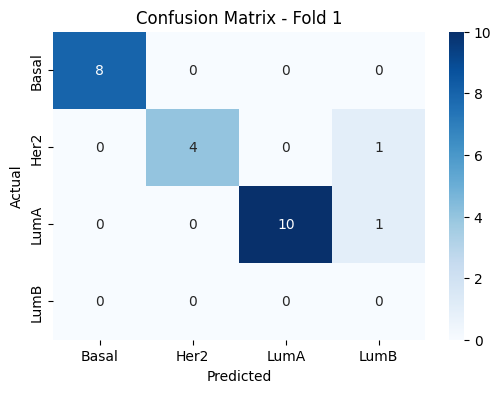


Confusion Matrix for Fold 2:


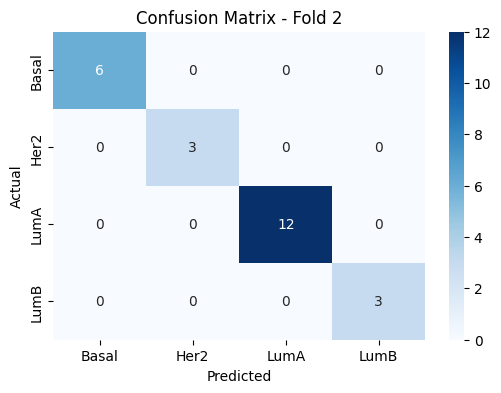


Confusion Matrix for Fold 3:


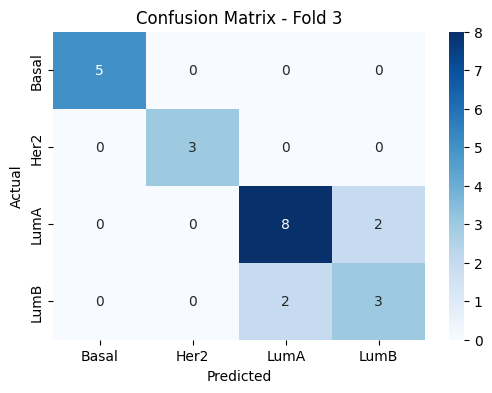


Confusion Matrix for Fold 4:


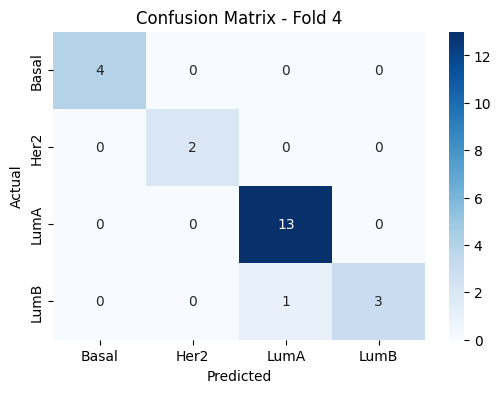


Confusion Matrix for Fold 5:


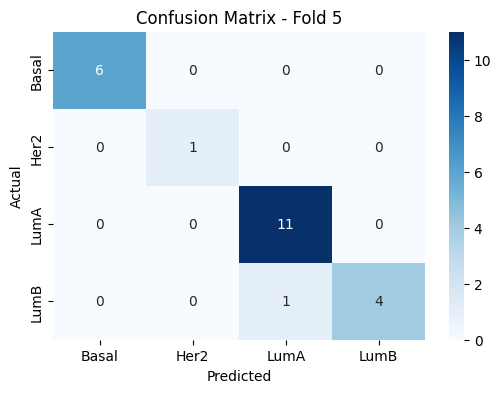

--- SVC ---
Avg accuracy : 0.931
Avg F1 : 0.895
Avg Recall : 0.912
Avg Precision : 0.883

Aggregated Confusion Matrix:


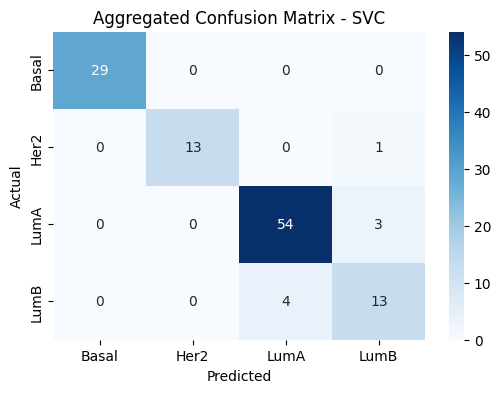

In [76]:
X = df_simpleInpute.iloc[:, 1:-1]
y = df_simpleInpute.iloc[:, -1]

kf = KFold(n_splits=k)
model = SVC(kernel='linear')

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_si_svc = []
all_pred_values_si_svc = []
all_y_test_si_svc = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_si_svc.extend(test_index)
    all_pred_values_si_svc.extend(pred_values)
    all_y_test_si_svc.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- SVC ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - SVC')
plt.show()

In [77]:
misclassification_analysis_df_svc_simple = pd.DataFrame({
    'Model': 'SVC/Simple Impute',
    'Original_Index': all_test_indices_si_svc,
    'Actual_Label': all_y_test_si_svc,
    'Predicted_Label': all_pred_values_si_svc
})

misclassified_instances_svc_simple = misclassification_analysis_df_svc_simple[misclassification_analysis_df_svc_simple['Actual_Label'] != misclassification_analysis_df_svc_simple['Predicted_Label']]

print("Misclassified Instances by the SVC:")
display(misclassified_instances_svc_simple)

print("\nOriginal data for misclassified instances (from df_simpleImpute):")
display(df_rfeca.loc[misclassified_instances_svc_simple['Original_Index']])

Misclassified Instances by the SVC:


,Model,Original_Index,Actual_Label,Predicted_Label
6,SVC/Simple Impute,6,LumA,LumB
19,SVC/Simple Impute,19,Her2,LumB
49,SVC/Simple Impute,49,LumA,LumB
51,SVC/Simple Impute,51,LumB,LumA
59,SVC/Simple Impute,59,LumA,LumB
60,SVC/Simple Impute,60,LumB,LumA
85,SVC/Simple Impute,85,LumB,LumA
99,SVC/Simple Impute,99,LumB,LumA



Original data for misclassified instances (from df_simpleImpute):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
6,X11BR051,0.8063,-0.7917,4.3564,1.2913,-0.3401,-0.2884,-0.9016,-2.0727,-0.9598,...,-3.9077,-0.3371,-0.9697,-7.5622,2.9425,2.7023,-0.6304,-0.5964,-0.6545,LumA
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
49,X11BR027,-0.1770,-0.2844,4.3043,1.6278,-0.2830,1.2461,-0.4030,-0.8186,-0.4191,...,1.4447,-0.5296,0.1624,-3.2176,0.9759,1.1300,0.8379,-0.2247,-0.3642,LumA
51,X18BR003,-1.0274,0.4489,0.6030,0.6028,0.9853,-1.5165,0.1208,-1.2933,-0.4016,...,-3.5239,0.7768,-0.6633,-0.7040,-0.1094,2.6649,0.9578,0.5672,1.6411,LumB
59,X11BR025,-0.8870,-1.8227,-0.5138,1.4752,1.7175,-1.8498,0.8108,-0.2684,-0.7618,...,0.1971,-1.0938,-0.4120,-3.6992,-1.5783,-4.5582,-1.0274,-1.6596,-1.0941,LumA
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
99,X21BR001,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,...,-1.3295,-0.1099,-0.1818,-6.5061,-1.2984,-1.2323,0.4035,0.4945,-0.1207,LumB


# Pipeline 12: Simple Impute + Gradient Boosting


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


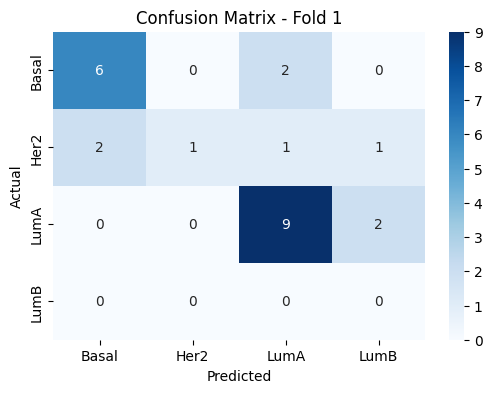


Confusion Matrix for Fold 2:


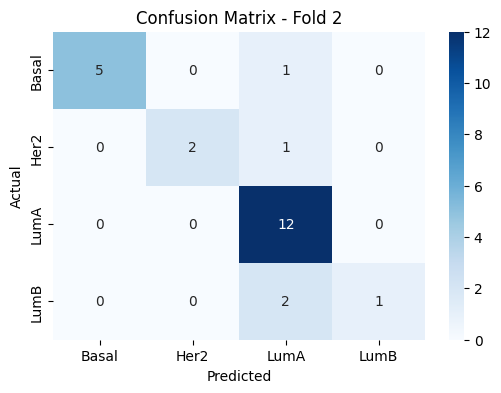


Confusion Matrix for Fold 3:


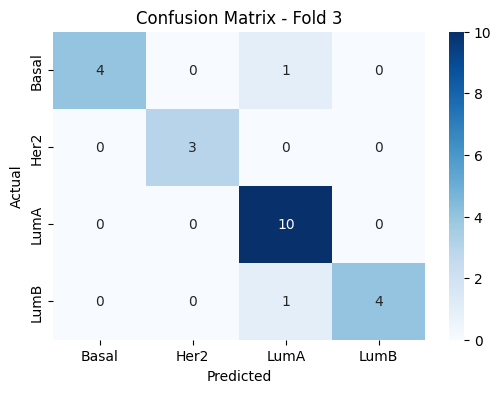


Confusion Matrix for Fold 4:


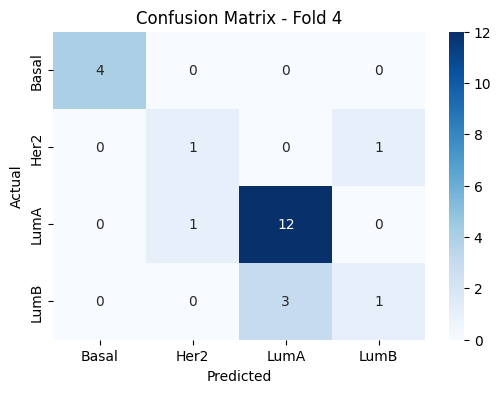


Confusion Matrix for Fold 5:


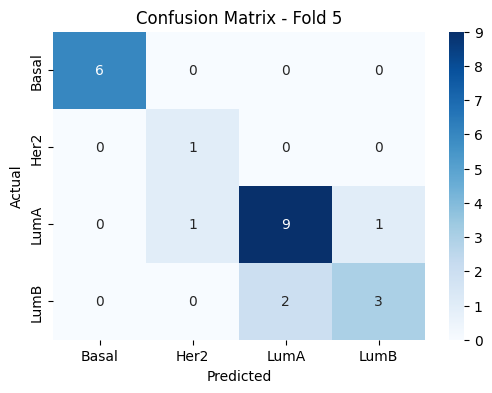

--- GradientBoostingClassifier ---
Avg accuracy : 0.804
Avg F1 : 0.723
Avg Recall : 0.798
Avg Precision : 0.715

Aggregated Confusion Matrix:


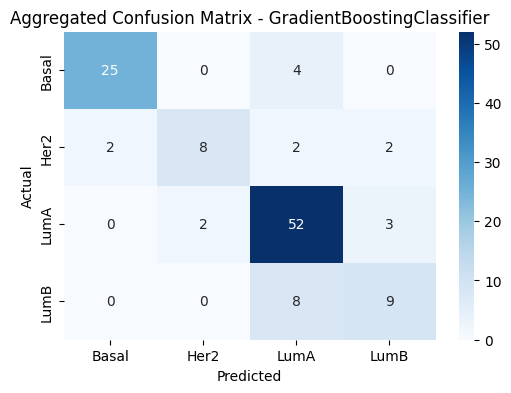

In [78]:
X = df_simpleInpute.iloc[:, 1:-1]
y = df_simpleInpute.iloc[:, -1]

kf = KFold(n_splits=k)
model = GradientBoostingClassifier(random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_si_gb = []
all_pred_values_si_gb = []
all_y_test_si_gb = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_si_gb.extend(test_index)
    all_pred_values_si_gb.extend(pred_values)
    all_y_test_si_gb.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- GradientBoostingClassifier ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - GradientBoostingClassifier')
plt.show()

In [79]:
misclassification_analysis_df_gradient_simple = pd.DataFrame({
    'Model': 'Gradient Boosting/Simple Impute',
    'Original_Index': all_test_indices_si_gb,
    'Actual_Label': all_y_test_si_gb,
    'Predicted_Label': all_pred_values_si_gb
})

misclassified_instances_gradient_simple = misclassification_analysis_df_gradient_simple[misclassification_analysis_df_gradient_simple['Actual_Label'] != misclassification_analysis_df_gradient_simple['Predicted_Label']]

print("Misclassified Instances by the Gradient Boosting Classifier:")
display(misclassified_instances_gradient_simple)

print("\nOriginal data for misclassified instances (from df_simpleImpute):")
display(df_rfeca.loc[misclassified_instances_gradient_simple['Original_Index']])

Misclassified Instances by the Gradient Boosting Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
5,Gradient Boosting/Simple Impute,5,Her2,Basal
8,Gradient Boosting/Simple Impute,8,LumA,LumB
9,Gradient Boosting/Simple Impute,9,Her2,Basal
10,Gradient Boosting/Simple Impute,10,Basal,LumA
11,Gradient Boosting/Simple Impute,11,LumA,LumB
12,Gradient Boosting/Simple Impute,12,Basal,LumA
19,Gradient Boosting/Simple Impute,19,Her2,LumB
23,Gradient Boosting/Simple Impute,23,Her2,LumA
25,Gradient Boosting/Simple Impute,25,LumB,LumA
29,Gradient Boosting/Simple Impute,29,LumB,LumA



Original data for misclassified instances (from df_simpleImpute):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
5,X18BR002,-1.6084,2.5970,-1.1292,-3.6968,-0.5029,0.6432,-0.7106,0.8987,0.2932,...,1.2391,0.2373,-0.1891,2.6180,-3.7292,2.168300,-1.2364,0.3654,-0.2426,Her2
8,X22BR005,-0.5472,1.2683,-2.1140,-1.6041,0.6033,1.0847,1.0360,0.1823,0.6905,...,1.5477,1.0482,-0.0516,0.0892,2.5845,-0.052000,-1.2013,0.3087,1.5750,LumA
9,X01BR017,-0.3631,2.3125,-1.2797,-3.7791,2.0076,0.1308,1.9430,4.5651,0.9990,...,1.4969,0.8710,2.1974,2.3869,-1.8694,2.823600,0.2018,1.2523,0.2148,Her2
10,X01BR026,1.9124,-0.3288,0.0205,-1.4368,-0.4524,-0.3873,-0.4468,2.9314,0.6944,...,1.8850,0.3225,-1.4134,3.7049,-2.7049,-4.899300,0.4942,0.0327,0.2596,Basal
11,X05BR003,-1.8428,1.0673,-0.7148,1.7733,-0.5356,0.7814,-0.4379,-0.2686,-0.9052,...,-1.3742,0.0260,-0.9146,1.7611,-0.7619,1.350200,-1.1848,1.9183,-0.7594,LumA
12,X11BR016,3.1258,1.9397,1.1233,-1.6194,2.4016,-1.6459,1.2610,2.8248,2.8239,...,3.1634,1.1725,0.7301,3.1751,-1.4383,-6.191227,1.4837,2.1174,1.9428,Basal
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.308200,0.0140,0.7328,2.3668,Her2
23,X05BR044,-1.9026,0.0175,-0.9034,-3.8815,0.1002,0.7659,-0.6464,-0.0741,0.2008,...,-0.2479,-0.5548,0.3567,-2.5423,-3.2600,4.689200,-1.8346,-1.1085,-1.6808,Her2
25,X11BR044,0.4840,1.2711,-1.5198,0.3070,1.6021,-0.6270,2.3928,1.1263,1.6842,...,-3.8553,2.1793,1.0758,-4.4343,2.2786,-1.286100,1.2967,2.1630,2.8773,LumB
29,X11BR043,-1.3974,1.7338,1.0562,-0.6908,2.6707,1.7734,2.2089,-0.1180,1.2061,...,-1.8444,2.4148,1.3588,-4.3305,6.3366,-1.778400,1.4316,2.9002,2.4844,LumB


In [80]:
X1 = df_rfeca.iloc[:, :-1]
kf = KFold(n_splits=k)
for fold, (train_index , test_index) in enumerate(kf.split(X1)):
  print('fold: ', fold)
  print('train', train_index)
  print('test', test_index)

fold:  0
train [ 24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116]
test [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
fold:  1
train [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116]
test [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
fold:  2
train [  0   1   2   3   4   5   6   7   8   

#Ensemble de Pipelines (meta-modelo) com voting=soft


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


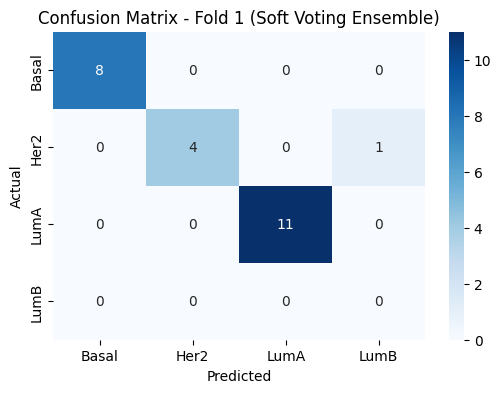


Confusion Matrix for Fold 2:


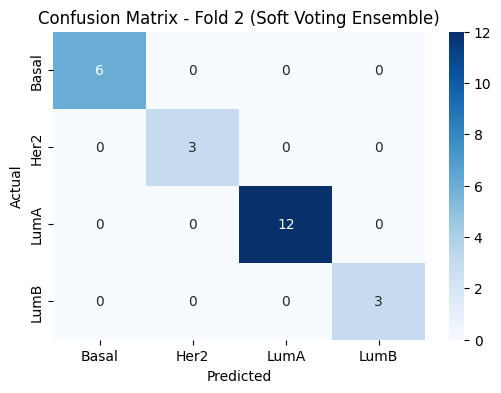


Confusion Matrix for Fold 3:


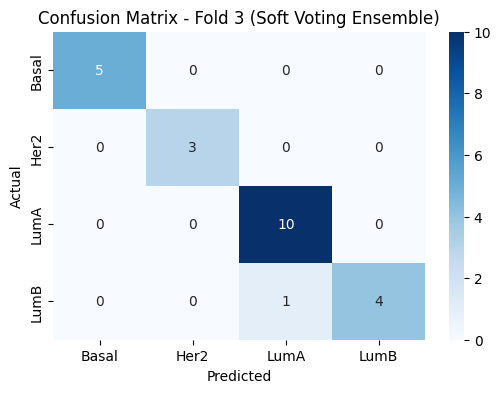


Confusion Matrix for Fold 4:


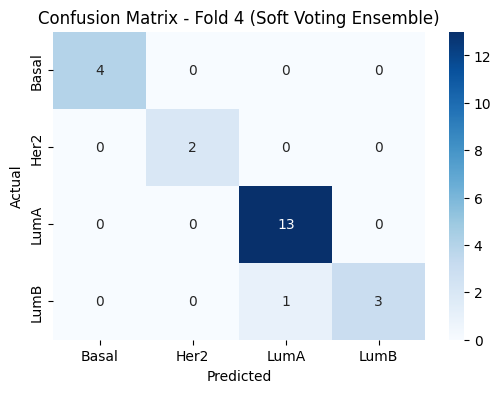


Confusion Matrix for Fold 5:


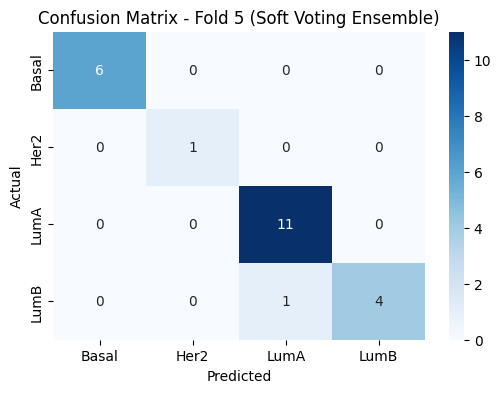


--- Soft Voting Ensemble ---
Avg accuracy : 0.966
Avg F1 : 0.92
Avg Recall : 0.907
Avg Precision : 0.938

Aggregated Confusion Matrix (Soft Voting Ensemble):


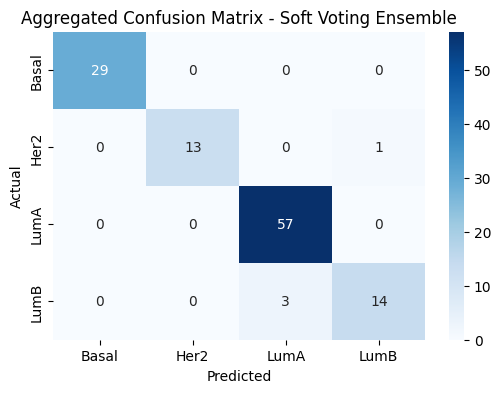

In [81]:
X1 = df_rfeca.iloc[:, 1:-1]
y1 = df_rfeca.iloc[:, -1]

X2 = df_knn.iloc[:, 1:-1]
y2 = df_knn.iloc[:, -1]

X3 = df_simpleInpute.iloc[:, 1:-1]
y3 = df_simpleInpute.iloc[:, -1]

X_ensemble = df_rfeca.iloc[:, 1:-1]
y_ensemble = df_rfeca.iloc[:, -1]

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices = []
all_pred_values = []
all_y_test = []

all_labels = sorted(y_ensemble.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X_ensemble)):
    X1_train , X1_test = X1.iloc[train_index,:],X1.iloc[test_index,:]
    y1_train , y1_test = y1[train_index] , y1[test_index]

    X2_train , X2_test = X2.iloc[train_index,:],X2.iloc[test_index,:]
    y2_train , y2_test = y2[train_index] , y2[test_index]

    X3_train , X3_test = X3.iloc[train_index,:],X3.iloc[test_index,:]
    y3_train , y3_test = y3[train_index] , y3[test_index]

    X_vc_train , X_vc_test = X_ensemble.iloc[train_index,:],X_ensemble.iloc[test_index,:]
    y_vc_train , y_vc_test = y_ensemble[train_index] , y_ensemble[test_index]

    # Initialize and train base models for RFECA
    model1_rfeca = RandomForestClassifier(random_state=42)
    model1_rfeca.fit(X1_train, y1_train)

    model2_rfeca = GradientBoostingClassifier(random_state=42)
    model2_rfeca.fit(X1_train, y1_train)

    model3_rfeca = LogisticRegression(random_state=42, max_iter=1000)
    model3_rfeca.fit(X1_train, y1_train)

    model4_rfeca = SVC(probability=True, random_state=42)
    model4_rfeca.fit(X1_train, y1_train)

    # Initialize and train base models for KNN Impute
    model1_knn = RandomForestClassifier(random_state=42)
    model1_knn.fit(X2_train, y2_train)

    model2_knn = GradientBoostingClassifier(random_state=42)
    model2_knn.fit(X2_train, y2_train)

    model3_knn = LogisticRegression(random_state=42, max_iter=1000)
    model3_knn.fit(X2_train, y2_train)

    model4_knn = SVC(probability=True, random_state=42)
    model4_knn.fit(X2_train, y2_train)

    # Initialize and train base models for Simple Impute
    model1_simple = RandomForestClassifier(random_state=42)
    model1_simple.fit(X3_train, y3_train)

    model2_simple = GradientBoostingClassifier(random_state=42)
    model2_simple.fit(X3_train, y3_train)

    model3_simple = LogisticRegression(random_state=42, max_iter=1000)
    model3_simple.fit(X3_train, y3_train)

    model4_simple = SVC(probability=True, random_state=42)
    model4_simple.fit(X3_train, y3_train)

    ensemble_models = VotingClassifier(estimators=[
        ('rfeca-rf', model1_rfeca), ('rfeca-gb', model2_rfeca), ('rfeca-lr', model3_rfeca), ('rfeca-svc', model4_rfeca),
        ('knn-rf', model1_knn), ('knn-gb', model2_knn), ('knn-lr', model3_knn), ('knn-svc', model4_knn),
        ('simple-rf', model1_simple), ('simple-gb', model2_simple), ('simple-lr', model3_simple), ('simple-svc', model4_simple)
    ],
    voting='soft')

    ensemble_models.fit(X_vc_train, y_vc_train)
    pred_values = ensemble_models.predict(X_vc_test)

    all_test_indices.extend(test_index)
    all_pred_values.extend(pred_values)
    all_y_test.extend(y_vc_test)

    acc_score.append(accuracy_score(y_vc_test , pred_values))
    f1_score_.append(f1_score(y_vc_test, pred_values, average='macro'))
    recall_score_.append(recall_score(y_vc_test, pred_values, average='macro'))
    precision_score_.append(precision_score(y_vc_test, pred_values, average='macro', zero_division=0))
    confusion_matrices.append(confusion_matrix(y_vc_test, pred_values, labels=all_labels))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1} (Soft Voting Ensemble)')
    plt.show()

avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('\n--- Soft Voting Ensemble ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix (Soft Voting Ensemble):")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - Soft Voting Ensemble')
plt.show()

In [82]:
df_rfeca['PAM50'].value_counts()

,count
PAM50,
LumA,57
Basal,29
LumB,17
Her2,14


In [83]:
    X3_train , X3_test = X3.iloc[train_index,:],X3.iloc[test_index,:]
    y3_train , y3_test = y3[train_index] , y3[test_index]

    #X4_train , X4_test = X4.iloc[train_index,:],X4.iloc[test_index,:]
    #y4_train , y4_test = y4[train_index] , y4[test_index]

    X3_test

,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDC6,...,PGR,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T
94,-1.1249,-0.5325,0.6085,-2.5691,-2.4527,-1.4463,-1.4517,-0.7088,-2.5000,-1.8417,...,-1.2697,0.3447,-1.6294,-0.4690,0.0606,-1.9940,4.544700,0.33180,-2.1984,-1.6723
95,0.2463,-5.3785,0.9689,1.3775,-10.1713,-0.1014,-5.7318,-1.6656,-9.4085,-6.5566,...,1.5827,-0.4661,-7.2925,-11.5183,2.8955,-0.8538,3.413900,-0.01366,-10.2685,-4.3253
96,1.0193,-0.1514,1.8934,-3.6653,1.6012,-1.0312,1.4375,4.2792,2.4564,-0.2232,...,-5.2893,1.7029,2.5291,1.2878,3.8066,-2.1436,-0.370348,0.71870,2.6473,1.6214
97,0.3482,-4.6291,0.6838,1.8598,-4.7365,-1.2970,-3.1477,-2.1224,-4.5681,-4.3060,...,5.9401,0.2451,-3.2852,-3.6049,8.9048,0.0854,1.917000,-2.69400,-4.3794,-3.7909
98,-0.8750,-0.4811,-1.2662,0.7261,-1.9080,-1.3547,-1.4181,-2.7074,-1.6647,-1.5312,...,7.2883,-3.8387,-2.8762,-1.9110,-2.1072,0.5842,4.304500,-1.66770,-2.4362,-1.7774
99,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,2.3421,...,-3.9340,-1.3295,-0.1099,-0.1818,-6.5061,-1.2984,-1.232300,0.40350,0.4945,-0.1207
100,-0.3102,-5.8861,2.9331,1.3140,-5.1440,-0.1030,-2.9225,-3.4947,-5.1512,0.6600,...,9.8371,-0.9596,-3.9684,-3.9170,0.3585,0.6250,1.929900,-0.01366,-6.0228,-1.8057
101,-0.0990,0.1907,1.6040,-1.4810,-0.0992,0.5104,0.2207,1.6779,-0.8417,0.8867,...,-0.8283,-1.2691,-0.3324,-0.1146,0.0162,0.3431,1.542400,0.01780,-0.1081,1.8301
102,-1.1210,2.0024,1.1423,-4.2558,0.4514,0.9136,0.5006,2.2942,1.1249,0.0396,...,-4.8269,-0.3509,-0.4282,2.3186,0.0542,-1.9634,3.645600,-0.77610,0.5623,-1.2526
103,0.4291,0.8811,0.7784,-0.1100,1.2932,1.0451,1.7809,-1.2274,0.7539,1.2087,...,4.5695,1.0469,0.4737,-0.1530,-3.5892,3.0704,0.667700,0.42850,2.3093,1.8881


In [84]:
misclassification_analysis_df_ensemble_soft = pd.DataFrame({
    'Model': 'Ensemble/Soft',
    'Original_Index': all_test_indices,
    'Actual_Label': all_y_test,
    'Predicted_Label': all_pred_values
})

misclassified_instances_ensemble_soft = misclassification_analysis_df_ensemble_soft[misclassification_analysis_df_ensemble_soft['Actual_Label'] != misclassification_analysis_df_ensemble_soft['Predicted_Label']]

print("Misclassified Instances by the Ensemble Model (Voting Classifier):")
display(misclassified_instances_ensemble_soft)

print("\nOriginal data for misclassified instances (from df_rfeca):")
display(df_rfeca.loc[misclassified_instances_ensemble_soft['Original_Index']])

Misclassified Instances by the Ensemble Model (Voting Classifier):


,Model,Original_Index,Actual_Label,Predicted_Label
19,Ensemble/Soft,19,Her2,LumB
60,Ensemble/Soft,60,LumB,LumA
85,Ensemble/Soft,85,LumB,LumA
99,Ensemble/Soft,99,LumB,LumA



Original data for misclassified instances (from df_rfeca):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
99,X21BR001,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,...,-1.3295,-0.1099,-0.1818,-6.5061,-1.2984,-1.2323,0.4035,0.4945,-0.1207,LumB


# Ensemble de Pipelines (meta-modelo) com voting hard


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


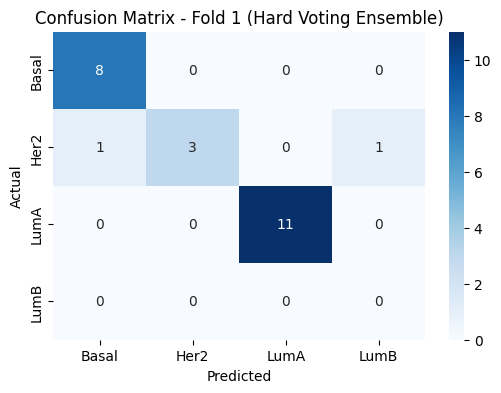


Confusion Matrix for Fold 2:


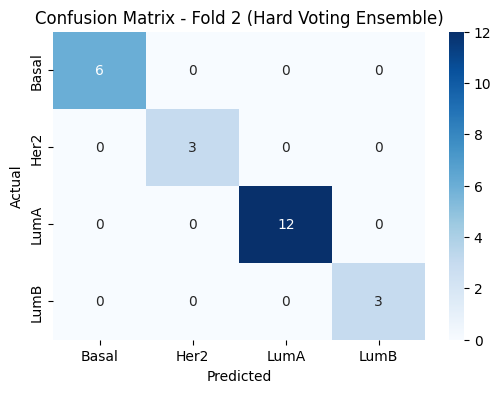


Confusion Matrix for Fold 3:


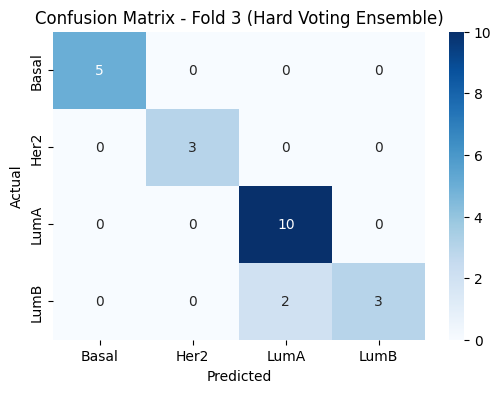


Confusion Matrix for Fold 4:


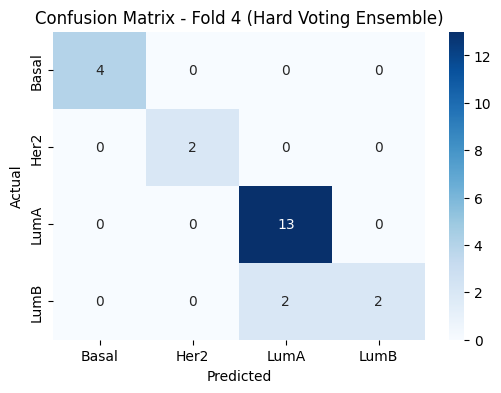


Confusion Matrix for Fold 5:


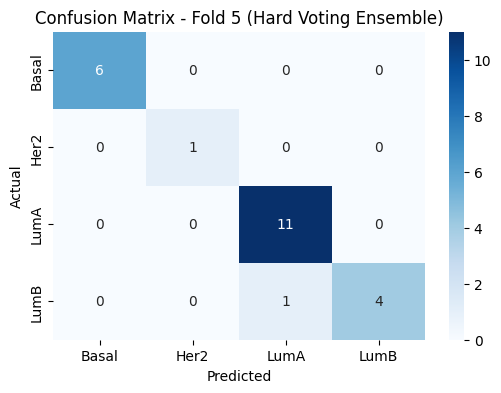


--- Hard Voting Ensemble ---
Avg accuracy : 0.94
Avg F1 : 0.89
Avg Recall : 0.875
Avg Precision : 0.925

Aggregated Confusion Matrix (Hard Voting Ensemble):


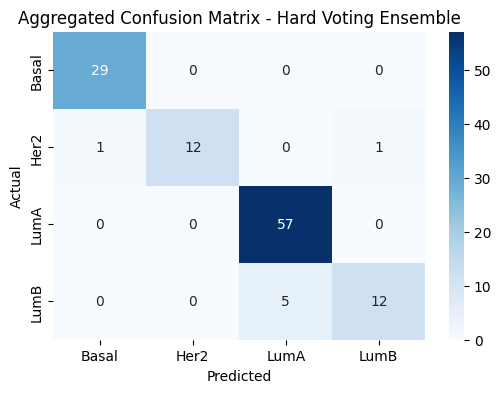

In [85]:
X1 = df_rfeca.iloc[:, 1:-1]
y1 = df_rfeca.iloc[:, -1]

X2 = df_knn.iloc[:, 1:-1]
y2 = df_knn.iloc[:, -1]

X3 = df_simpleInpute.iloc[:, 1:-1]
y3 = df_simpleInpute.iloc[:, -1]

X_ensemble = df_rfeca.iloc[:, 1:-1]
y_ensemble = df_rfeca.iloc[:, -1]

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices = []
all_pred_values = []
all_y_test = []

all_labels = sorted(y_ensemble.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X_ensemble)):
    X1_train , X1_test = X1.iloc[train_index,:],X1.iloc[test_index,:]
    y1_train , y1_test = y1[train_index] , y1[test_index]

    X2_train , X2_test = X2.iloc[train_index,:],X2.iloc[test_index,:]
    y2_train , y2_test = y2[train_index] , y2[test_index]

    X3_train , X3_test = X3.iloc[train_index,:],X3.iloc[test_index,:]
    y3_train , y3_test = y3[train_index] , y3[test_index]

    X_vc_train , X_vc_test = X_ensemble.iloc[train_index,:],X_ensemble.iloc[test_index,:]
    y_vc_train , y_vc_test = y_ensemble[train_index] , y_ensemble[test_index]

    # Initialize and train base models for RFECA
    model1_rfeca = RandomForestClassifier(random_state=42)
    model1_rfeca.fit(X1_train, y1_train)

    model2_rfeca = GradientBoostingClassifier(random_state=42)
    model2_rfeca.fit(X1_train, y1_train)

    model3_rfeca = LogisticRegression(random_state=42, max_iter=1000)
    model3_rfeca.fit(X1_train, y1_train)

    model4_rfeca = SVC(probability=True, random_state=42)
    model4_rfeca.fit(X1_train, y1_train)

    # Initialize and train base models for KNN Impute
    model1_knn = RandomForestClassifier(random_state=42)
    model1_knn.fit(X2_train, y2_train)

    model2_knn = GradientBoostingClassifier(random_state=42)
    model2_knn.fit(X2_train, y2_train)

    model3_knn = LogisticRegression(random_state=42, max_iter=1000)
    model3_knn.fit(X2_train, y2_train)

    model4_knn = SVC(probability=True, random_state=42)
    model4_knn.fit(X2_train, y2_train)

    # Initialize and train base models for Simple Impute
    model1_simple = RandomForestClassifier(random_state=42)
    model1_simple.fit(X3_train, y3_train)

    model2_simple = GradientBoostingClassifier(random_state=42)
    model2_simple.fit(X3_train, y3_train)

    model3_simple = LogisticRegression(random_state=42, max_iter=1000)
    model3_simple.fit(X3_train, y3_train)

    model4_simple = SVC(random_state=42)
    model4_simple.fit(X3_train, y3_train)

    ensemble_models = VotingClassifier(estimators=[
        ('rfeca-rf', model1_rfeca), ('rfeca-gb', model2_rfeca), ('rfeca-lr', model3_rfeca), ('rfeca-svc', model4_rfeca),
        ('knn-rf', model1_knn), ('knn-gb', model2_knn), ('knn-lr', model3_knn), ('knn-svc', model4_knn),
        ('simple-rf', model1_simple), ('simple-gb', model2_simple), ('simple-lr', model3_simple), ('simple-svc', model4_simple)
    ],
    voting='hard')

    ensemble_models.fit(X_vc_train, y_vc_train)
    pred_values = ensemble_models.predict(X_vc_test)

    all_test_indices.extend(test_index)
    all_pred_values.extend(pred_values)
    all_y_test.extend(y_vc_test)

    acc_score.append(accuracy_score(y_vc_test , pred_values))
    f1_score_.append(f1_score(y_vc_test, pred_values, average='macro'))
    recall_score_.append(recall_score(y_vc_test, pred_values, average='macro'))
    precision_score_.append(precision_score(y_vc_test, pred_values, average='macro', zero_division=0))
    confusion_matrices.append(confusion_matrix(y_vc_test, pred_values, labels=all_labels))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1} (Hard Voting Ensemble)')
    plt.show()

avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('\n--- Hard Voting Ensemble ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix (Hard Voting Ensemble):")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - Hard Voting Ensemble')
plt.show()

In [86]:
misclassification_analysis_df_ensemble_hard = pd.DataFrame({
    'Model': 'Ensemble/hard',
    'Original_Index': all_test_indices,
    'Actual_Label': all_y_test,
    'Predicted_Label': all_pred_values
})

misclassified_instances_ensemble_hard = misclassification_analysis_df_ensemble_hard[misclassification_analysis_df_ensemble_hard['Actual_Label'] != misclassification_analysis_df_ensemble_hard['Predicted_Label']]

print("Misclassified Instances by the Ensemble Model (Voting Classifier):")
display(misclassified_instances_ensemble_hard)

print("\nOriginal data for misclassified instances (from df_rfeca):")
display(df_rfeca.loc[misclassified_instances_ensemble_hard['Original_Index']])

Misclassified Instances by the Ensemble Model (Voting Classifier):


,Model,Original_Index,Actual_Label,Predicted_Label
9,Ensemble/hard,9,Her2,Basal
19,Ensemble/hard,19,Her2,LumB
51,Ensemble/hard,51,LumB,LumA
60,Ensemble/hard,60,LumB,LumA
85,Ensemble/hard,85,LumB,LumA
87,Ensemble/hard,87,LumB,LumA
99,Ensemble/hard,99,LumB,LumA



Original data for misclassified instances (from df_rfeca):


,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
9,X01BR017,-0.3631,2.3125,-1.2797,-3.7791,2.0076,0.1308,1.9430,4.5651,0.9990,...,1.4969,0.8710,2.1974,2.3869,-1.8694,2.8236,0.2018,1.2523,0.2148,Her2
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
51,X18BR003,-1.0274,0.4489,0.6030,0.6028,0.9853,-1.5165,0.1208,-1.2933,-0.4016,...,-3.5239,0.7768,-0.6633,-0.7040,-0.1094,2.6649,0.9578,0.5672,1.6411,LumB
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
87,X11BR075,-0.4407,2.1178,-0.7855,-0.1167,1.4519,-0.8742,-0.7657,1.3136,0.4032,...,0.6963,1.6248,1.7457,1.5824,5.1998,-5.0991,-0.3122,1.4293,1.4136,LumB
99,X21BR001,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,...,-1.3295,-0.1099,-0.1818,-6.5061,-1.2984,-1.2323,0.4035,0.4945,-0.1207,LumB


# Analise de resultados

###Passar dataset de erros para uma lista

In [87]:
lista_de_dfs_de_erro = [
    misclassified_instances_logistic_rfeca,
    misclassified_instances_rf_rfeca,
    misclassified_instances_svc_rfeca,
    misclassified_instances_gradient_rfeca,
    misclassified_instances_logistic_knn,
    misclassified_instances_rf_knn,
    misclassified_instances_svc_knn,
    misclassified_instances_gradient_knn,
    misclassified_instances_logistic_simple,
    misclassified_instances_rf_simple,
    misclassified_instances_svc_simple,
    misclassified_instances_gradient_simple,
    misclassified_instances_ensemble_soft,
    misclassified_instances_ensemble_hard
]
misclassified_instances_ensemble_soft

,Model,Original_Index,Actual_Label,Predicted_Label
19,Ensemble/Soft,19,Her2,LumB
60,Ensemble/Soft,60,LumB,LumA
85,Ensemble/Soft,85,LumB,LumA
99,Ensemble/Soft,99,LumB,LumA


###Concatenar e verificar erros por pipeline

In [88]:
lista_de_indices_errados = [df for df in lista_de_dfs_de_erro]
lista_de_dfs_de_erro = pd.concat(lista_de_indices_errados, ignore_index=True)
contagem_de_erros_por_instancia = lista_de_dfs_de_erro.value_counts()
lista_de_dfs_de_erro['Model'].value_counts()

,count
Model,
Gradient Boosting/Simple Impute,23
Gradient Boosting/KNN Impute,20
Gradient Boosting/RFECA,16
SVC/RFECA,12
Logistic Regression/KNN Impute,12
Logistic Regression/RFECA,12
Random Forest/Simple Impute,10
Random Forest/KNN Impute,10
SVC/KNN Impute,9


### Montar matriz de erros por pipeline

In [89]:
matriz_erros = pd.crosstab(index=lista_de_dfs_de_erro['Original_Index'],
                           columns=lista_de_dfs_de_erro['Model'])
# matriz_erros = matriz_erros.reset_index()
matriz_erros.columns.name = None
#matriz_erros['Total_Erros'] = matriz_erros.iloc[:, :].sum(axis=1)
matriz_erros['Total_Erros'] = matriz_erros.sum(axis=1)
matriz_erros_ordenada = matriz_erros.sort_values(by='Total_Erros', ascending=False)
matriz_erros_ordenada

,Ensemble/Soft,Ensemble/hard,Gradient Boosting/KNN Impute,Gradient Boosting/RFECA,Gradient Boosting/Simple Impute,Logistic Regression/KNN Impute,Logistic Regression/RFECA,Logistic Regression/Simple Impute,Random Forest/KNN Impute,Random Forest/RFECA,Random Forest/Simple Impute,SVC/KNN Impute,SVC/RFECA,SVC/Simple Impute,Total_Erros
Original_Index,,,,,,,,,,,,,,,
85,1,1,1,1,1,1,1,1,1,1,1,1,1,1,14
99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,14
60,1,1,1,1,1,1,1,1,1,1,1,1,1,1,14
19,1,1,1,0,1,1,1,1,1,1,1,1,1,1,13
51,0,1,0,0,0,1,1,1,0,0,0,1,1,1,7
9,0,1,1,1,1,0,0,0,1,0,1,0,0,0,6
56,0,0,1,1,1,0,0,0,1,1,1,0,0,0,6
59,0,0,0,0,0,1,1,1,0,0,0,1,1,1,6
8,0,0,1,1,1,0,0,0,1,1,1,0,0,0,6


### Exibir genes que todos os modelos erraram

In [90]:
df_rfeca.loc[misclassified_instances_ensemble_soft['Original_Index']]

,Patient_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T,PAM50
19,X09BR005,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,...,-0.9886,1.0212,1.3644,-5.4509,-1.7412,1.3082,0.0140,0.7328,2.3668,Her2
60,X11BR019,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,...,0.6414,0.2976,-1.7443,-5.0341,4.1919,-2.7916,1.6744,-0.3229,0.7071,LumB
85,X11BR011,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,...,-3.1419,1.2848,0.3679,0.6072,5.2367,-0.1324,-1.5069,-0.5300,-1.0148,LumB
99,X21BR001,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,...,-1.3295,-0.1099,-0.1818,-6.5061,-1.2984,-1.2323,0.4035,0.4945,-0.1207,LumB
